In [1]:
!python --version
import sys
sys.executable

Python 2.7.6


'/usr/bin/python2'

In [2]:
from math import sqrt
import os
import glob

from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

import lstm2
import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


### This notebook shows how we train a small number of stocks to predict the next 30 day price

# 1. Use stock data only

In [3]:
source_dir='../data/sp500_test'
nlp_dir = None #'../data/nlp_by_company'
revenue_dir = None
# Please make sure these 3 dirs exist 
models_dir = '../models/sp500_test_30/'
supervised_data_dir = '../data/sup_sp500_test_30'
prediction_data_dir = '../data/prediction/sp500_test_30'

rmse_csv = '../data/rsme_ltsm_30.csv'
# look back n days. Note: The hight n_lags is, the more overfitting it becomes 
# because there are more features added with the fix number of data we currently have.
# When we add more features later, we may have to cut down n_lags even more
n_lags = 5 
n_forecast = 30 
n_test = 90 # test = last 90 days from data
'''
config_file = '../config/lstm2.config'
source_dir, models_dir, supervised_data_dir, prediction_data_dir, rmse_csv,n_lags, n_forecast, n_test = lstm2.read_config(config_file)
'''
n_features, orig_dfs, datasets = lstm2.set_up_data(source_dir, 
                                                   nlp_dir, 
                                                   revenue_dir,
                                                   supervised_data_dir, 
                                                   n_lags, 
                                                   n_forecast)
n_features

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2001-06-15  21.080000  24.000000  21.080000  24.000000  18.632792    4200
2001-06-18  24.480000  25.320000  24.480000  25.080000  19.471264   10900
2001-06-19  25.480000  26.719999  25.480000  26.559999  20.620283   24600
2001-06-20  26.559999  27.080000  26.559999  26.879999  20.868715   56000
2001-06-21  26.719999  26.719999  25.400000  25.400000  19.719694   36700
COL
../data/sp500_test/COL.csv has 720 rows
             Volume  Adj Close
Date                          
2015-01-02   458200  81.343025
2015-01-05   746300  80.631676
2015-01-06  1000800  80.525940
2015-01-07  1450200  81.631401
2015-01-08  2587500  82.525391
(686, 12)
('Generating', '../data/sup_sp500_test_30/COL_supervised.csv')
              Open    High     Low  Close  Adj Close    Volume
Date                                                          
2004-06-23  3.7500  4.

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2000-01-03  22.188049  22.297892  21.748682  22.133129  14.165102  1877800
2000-01-04  21.419157  22.023287  20.430580  21.583920  13.813610  1856900
2000-01-05  21.474077  21.638840  20.430580  20.595343  13.245640  1165000
2000-01-06  20.815027  20.979790  20.155975  20.815027  13.386929  1755300
2000-01-07  21.089630  22.133129  20.869947  21.583920  13.881429  1616100
MAS
../data/sp500_test/MAS.csv has 720 rows
             Volume  Adj Close
Date                          
2015-01-02  3013100  21.125765
2015-01-05  2948600  20.762539
2015-01-06  3432500  20.737206
2015-01-07  2725200  21.061586
2015-01-08  4808500  21.901331
(686, 12)
('Generating', '../data/sup_sp500_test_30/MAS_supervised.csv')
               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2000-01

2

Data for COL


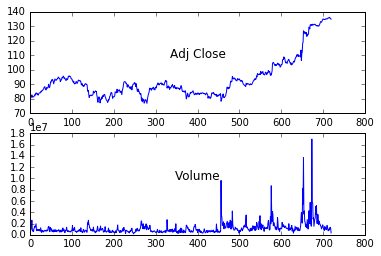

Data for CRM


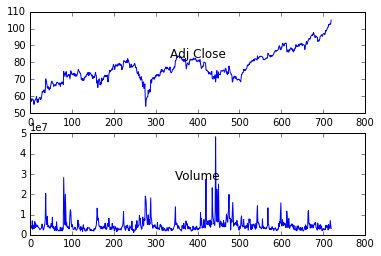

Data for DGX


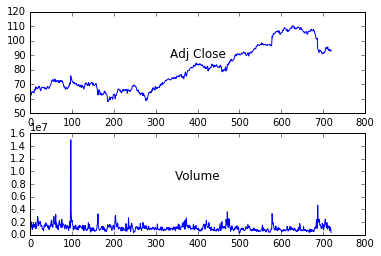

Data for FOX


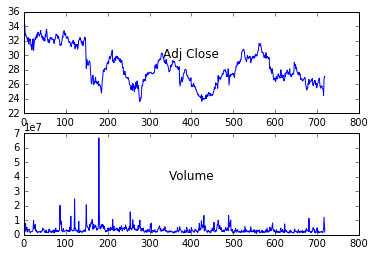

Data for FOXA


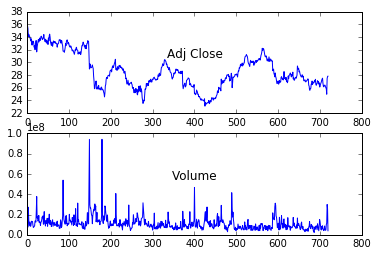

Data for FTI


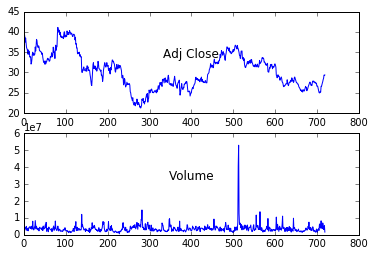

Data for JWN


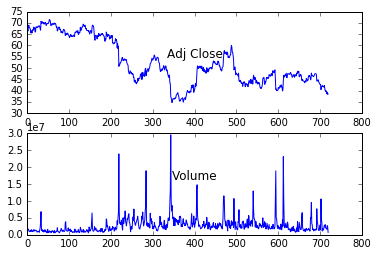

Data for KORS


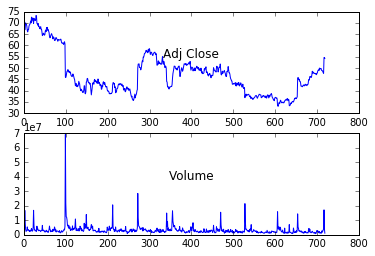

Data for LUV


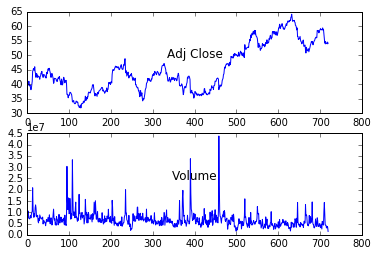

Data for M


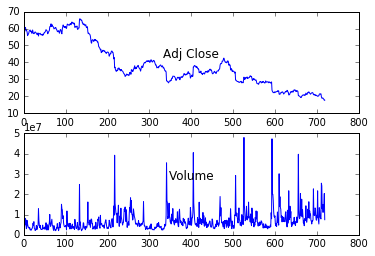

Data for MA


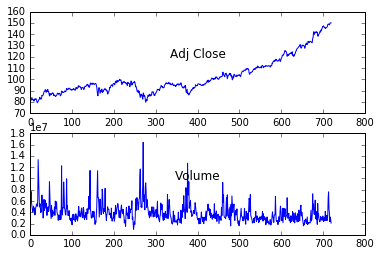

Data for MAA


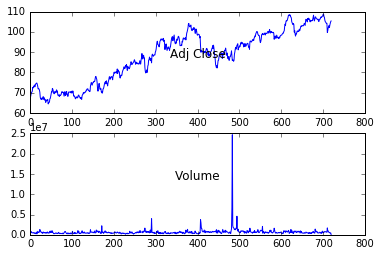

Data for MAC


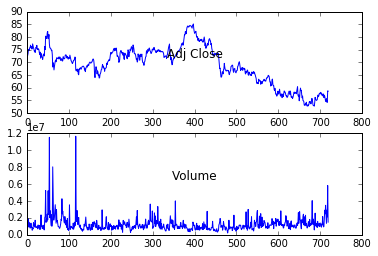

Data for MAR


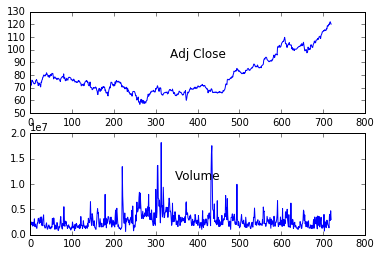

Data for MAS


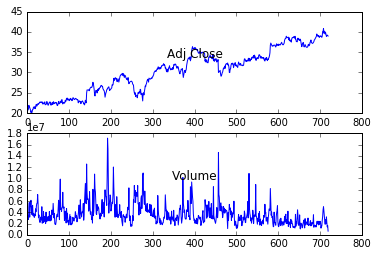

Data for MAT


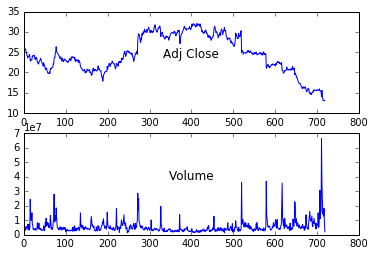

Data for MCD


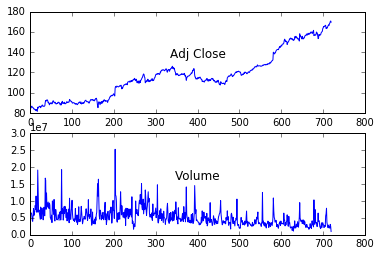

Data for MCHP


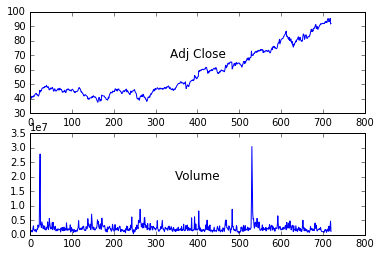

Data for MCK


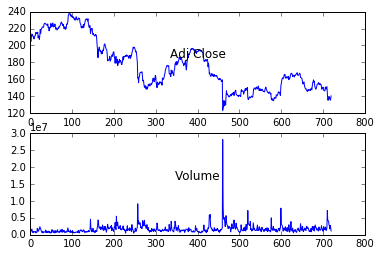

Data for MCO


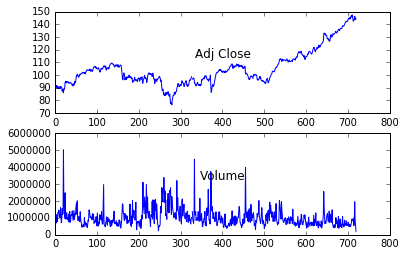

Data for MSFT


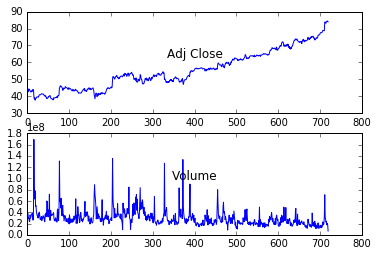

Data for NDAQ


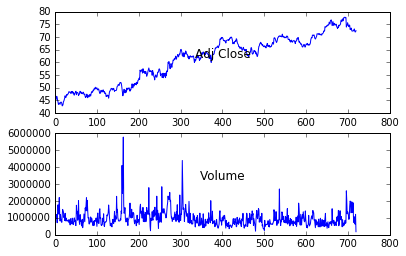

Data for NFLX


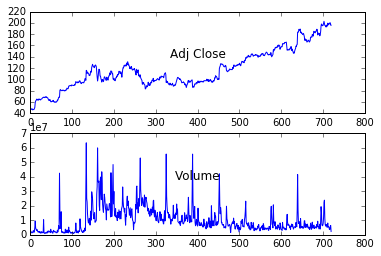

Data for NKE


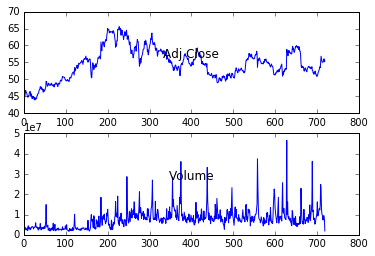

Data for ORCL


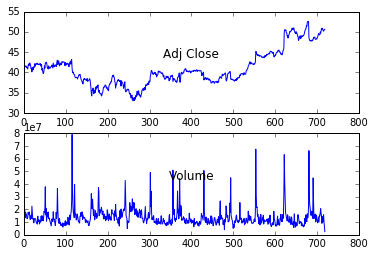

In [4]:
def view_dataframe(df):
    dataset = df
    values = dataset.values
    # Revised order of columns
    groups = np.array(range(len(list(dataset))-1, -1, -1)) #[0, 1, 2, 3, 5] #, 6, 7
    #groups = np.array(range(len(list(dataset)))) #[0, 1, 2, 3, 5] #, 6, 7
    # specify columns to plot
    i = 1
    # plot each column
    for group in groups:
        pyplot.subplot(len(groups), 1, i)
        pyplot.plot(values[:, group]) #,ax=ax)
        pyplot.title(dataset.columns[group], y=0.5) #, loc='left')
        i += 1
    pyplot.show()

for stock in sorted(orig_dfs.keys()):
    pyplot.figure(figsize=(6,4))
    print('Data for ' + stock)
    view_dataframe(orig_dfs[stock])

#view_dataframe(orig_dfs['MSFT'])

# Multiple lag timesteps

In [6]:
histories = lstm2.build_models(supervised_data_dir, models_dir, n_test, n_lags, n_features, 20)

('Processing', 'COL')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 1s - loss: 0.0861 - val_loss: 0.3243
Epoch 2/30
596/596 [==============================] - 1s - loss: 0.0722 - val_loss: 0.2279
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.0673 - val_loss: 0.2576
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.0666 - val_loss: 0.2052
Epoch 5/30
596/596 [==============================] - 1s - loss: 0.0664 - val_loss: 0.2288
Epoch 6/30
596/596 [==============================] - 1s - loss: 0.0651 - val_loss: 0.2124
Epoch 7/30
596/596 [==============================] - 1s - loss: 0.0655 - val_loss: 0.2095
('Saving model to', '../models/sp500_test_30/COL.h5')
('Processing', 'CRM')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 1s - loss: 0.1071 - val_loss: 0.1628
Epoch 2/30
596/596 [==============================] - 1s - loss: 0.0814 - val_loss: 

596/596 [==============================] - 2s - loss: 0.0889 - val_loss: 0.1431
Epoch 2/30
596/596 [==============================] - 1s - loss: 0.0739 - val_loss: 0.1184
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.0719 - val_loss: 0.1302
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.0709 - val_loss: 0.1325
Epoch 5/30
596/596 [==============================] - 1s - loss: 0.0686 - val_loss: 0.1856
('Saving model to', '../models/sp500_test_30/MAR.h5')
('Processing', 'MAS')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 2s - loss: 0.1087 - val_loss: 0.1177
Epoch 2/30
596/596 [==============================] - 1s - loss: 0.0911 - val_loss: 0.0834
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.0918 - val_loss: 0.0986
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.0902 - val_loss: 0.1012
Epoch 5/30
596/596 [==============================] - 1s - loss: 0.0902

596/596 [==============================] - 1s - loss: 0.0922 - val_loss: 0.0504
('Saving model to', '../models/sp500_test_30/M.h5')
('Processing', 'NDAQ')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 2s - loss: 0.1059 - val_loss: 0.0981
Epoch 2/30
596/596 [==============================] - 1s - loss: 0.0777 - val_loss: 0.0896
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.0766 - val_loss: 0.0838
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.0768 - val_loss: 0.0819
Epoch 5/30
596/596 [==============================] - 1s - loss: 0.0772 - val_loss: 0.1084
Epoch 6/30
596/596 [==============================] - 1s - loss: 0.0755 - val_loss: 0.1135
Epoch 7/30
596/596 [==============================] - 1s - loss: 0.0759 - val_loss: 0.1025
('Saving model to', '../models/sp500_test_30/NDAQ.h5')
('Processing', 'NFLX')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [====================

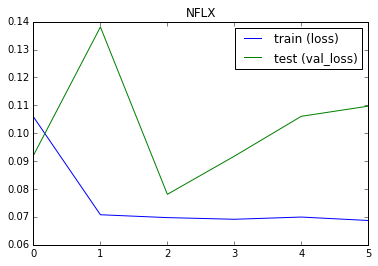

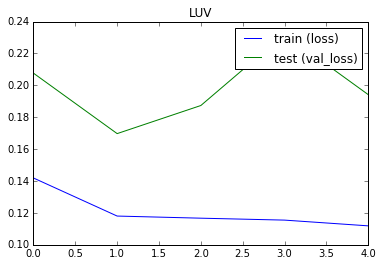

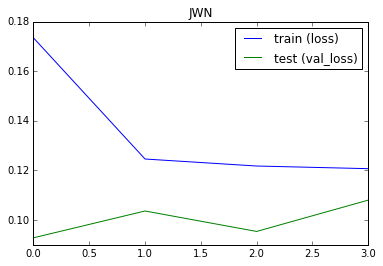

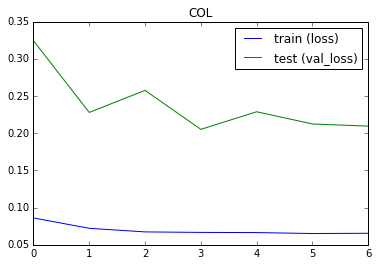

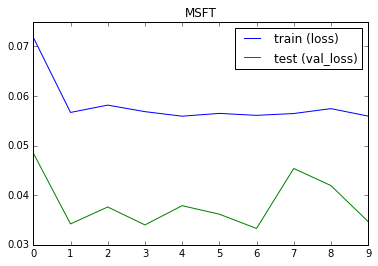

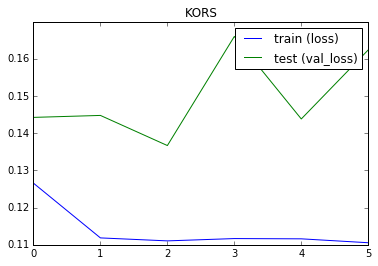

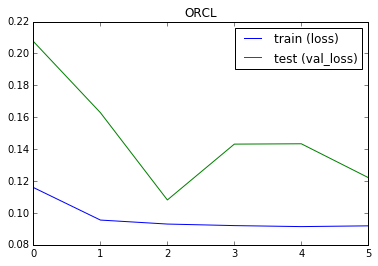

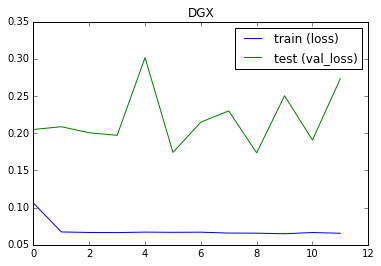

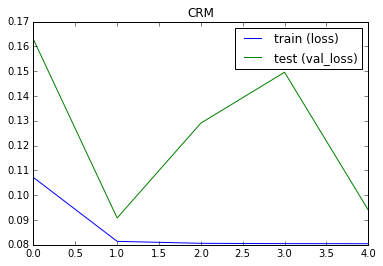

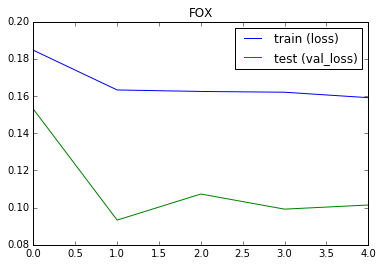

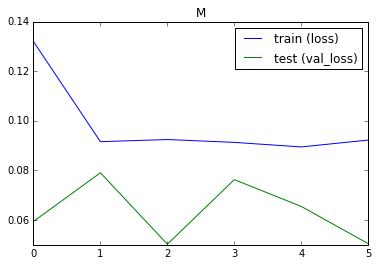

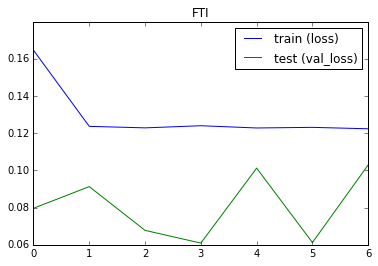

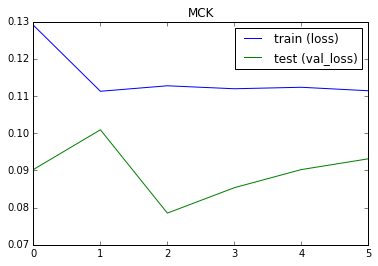

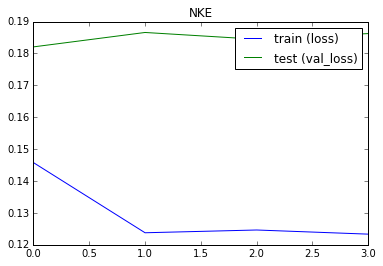

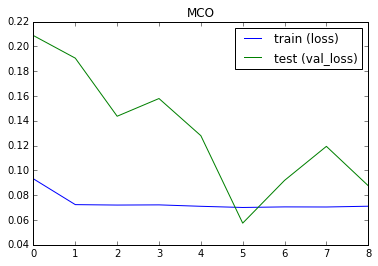

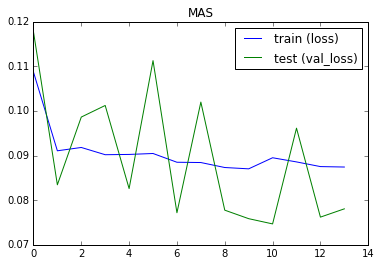

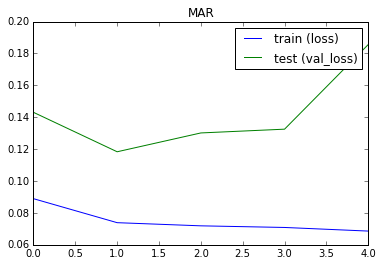

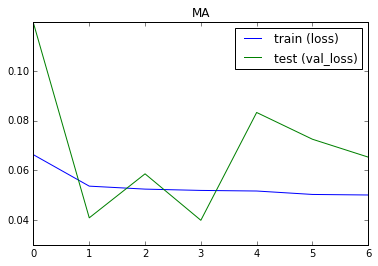

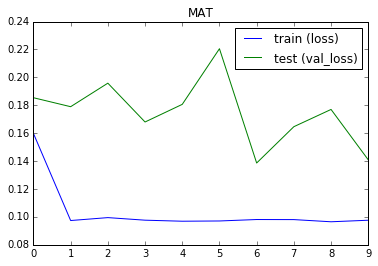

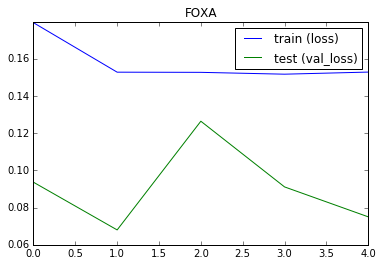

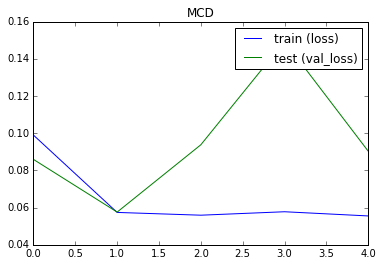

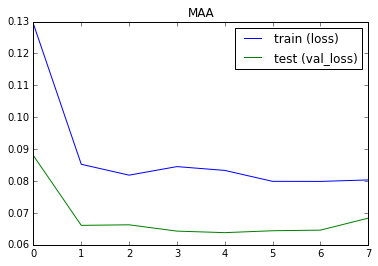

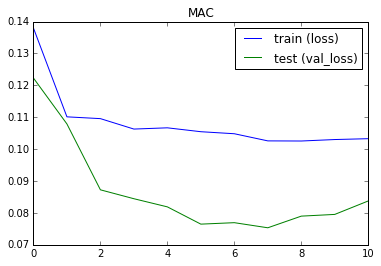

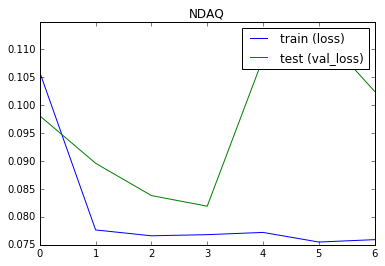

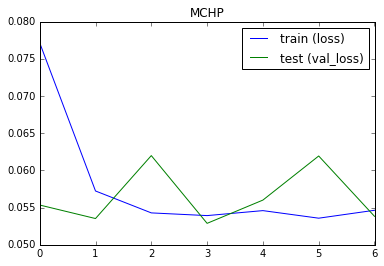

In [7]:
#print(histories)
for stock in histories.keys(): # plot history
    history = histories[stock]
    plt.plot(history.history['loss'], label='train (loss)')
    plt.plot(history.history['val_loss'], label='test (val_loss)')
    plt.title(stock)
    plt.legend()
    plt.show()

In [8]:
predicted_dfs, rmse_df = lstm2.predict_evaluate(models_dir, 
                                                supervised_data_dir, 
                                                prediction_data_dir, 
                                                rmse_csv, 
                                                n_test, n_lags, n_features, n_forecast)

../models/sp500_test_30/*.h5
('loading', '../models/sp500_test_30/COL.h5')
('Reading', '../data/sup_sp500_test_30/COL_supervised.csv')
Predicting...
Test RMSE: 15.313
('Writing to', '../data/prediction/sp500_test_30/COL_predicted.csv')
('loading', '../models/sp500_test_30/CRM.h5')
('Reading', '../data/sup_sp500_test_30/CRM_supervised.csv')
Predicting...
Test RMSE: 5.530
('Writing to', '../data/prediction/sp500_test_30/CRM_predicted.csv')
('loading', '../models/sp500_test_30/DGX.h5')
('Reading', '../data/sup_sp500_test_30/DGX_supervised.csv')
Predicting...
Test RMSE: 15.452
('Writing to', '../data/prediction/sp500_test_30/DGX_predicted.csv')
('loading', '../models/sp500_test_30/FOX.h5')
('Reading', '../data/sup_sp500_test_30/FOX_supervised.csv')
Predicting...
Test RMSE: 1.241
('Writing to', '../data/prediction/sp500_test_30/FOX_predicted.csv')
('loading', '../models/sp500_test_30/FOXA.h5')
('Reading', '../data/sup_sp500_test_30/FOXA_supervised.csv')
Predicting...
Test RMSE: 1.062
('Writ

In [9]:
def plot_data(rmse_df, predicted_dfs):
    cnt = 1
    for index, row in sorted(rmse_df.iterrows()):
        key = row['Stock Model']
        if (cnt % 2 != 0):
            fig, axes = plt.subplots(nrows=1, ncols=2)
            ax=axes[0]
        else:
            ax=axes[1]
        predicted_dfs[key].plot(title=key + ': n_forecast = ' + str(n_forecast) +
                                ', n_lags = ' + str(n_lags) + ': price vs days', 
                                figsize=(15,4), 
                                ax=ax)
        cnt += 1
    plt.show()

In [10]:
# default is sort by 'Avg predicted gain'
rmse_df

Stock Model       rsme  predicted_std  actual_std  Day 0 predicted gain  \
13         MAR  14.189829       4.986046    6.840695              0.137528   
2          DGX  15.451655       2.735447    6.783398              0.077961   
10          MA   6.387898      12.526800    8.211579              0.009086   
16         MCD   8.392760       4.599549    4.721736              0.060953   
9            M   2.839298       0.657467    1.409051              0.056556   
5          FTI   2.383899       0.916671    1.079666             -0.015523   
8          LUV   7.947364       5.132798    3.238836              0.033051   
0          COL  15.312703      19.613844    9.958718             -0.027711   
17        MCHP   3.896203       3.708233    5.172642              0.028340   
6          JWN   4.659710       2.054529    2.579945              0.046878   
20        MSFT   2.452478       2.351700    3.717512              0.017467   
15         MAT   3.015099       1.752829    2.341126             -0.009256   
18         MCK  13.234526       5.850716    8.287043             -0.025222   
19         MCO   6.741043       7.524907    7.055157              0.012679   
3          FOX   1.240963       0.391744    0.900586              0.019110   
4         FOXA   1.061940       0.470322    0.828470              0.014854   
14         MAS   1.710187       0.616991    1.085133             -0.006867   
12         MAC   3.164919       2.014531    1.905871             -0.011596   
23         NKE   4.091750       1.742147    2.779957              0.018194   
22        NFLX  18.033003      11.638722   13.328521             -0.002698   
11         MAA   3.575418       1.972160    2.622831              0.000451   
24        ORCL   3.409890       2.611493    1.182792             -0.028551   
1          CRM   5.529529       2.076375    4.143099             -0.016074   
21        NDAQ   3.641927       2.219193    1.884039             -0.001913   
7         KORS   6.773855       2.995913    5.524920             -0.029177   

    Day 0 actual gain  Avg predicted gain  Avg actual gain  
13          -0.029265            0.153691         0.036653  
2            0.039793            0.088196        -0.046066  
10           0.026913            0.086751         0.061540  
16           0.039406            0.078177         0.028197  
9            0.021735            0.077873        -0.033394  
5           -0.145171            0.057645        -0.015551  
8            0.074187            0.053052        -0.020107  
0            0.022653            0.049187         0.082989  
17          -0.039083            0.045832         0.043760  
6            0.154909            0.040705        -0.018891  
20           0.009204            0.028011         0.042196  
15          -0.042028            0.027376        -0.113384  
18           0.065205            0.026527        -0.034566  
19           0.078368            0.016641         0.065583  
3            0.034815            0.016239        -0.013437  
4            0.040352            0.010154        -0.009565  
14           0.025813           -0.005197         0.014178  
12          -0.010417           -0.007546        -0.005821  
23           0.119957           -0.010086         0.002008  
22          -0.060766           -0.011369         0.073146  
11           0.052568           -0.013627         0.003640  
24           0.108223           -0.015045         0.020995  
1           -0.016191           -0.017082         0.035469  
21           0.061155           -0.017220         0.023595  
7           -0.012476           -0.026768         0.118274

In [11]:
#rmse_df#.sort_values(by='Day 0 actual gain', ascending=False)

In [12]:
predicted_dfs2, summary_df = lstm2.read_prediction_files(prediction_data_dir)
# Should be exactly the same as rmse_df above
summary_df

Stock Model       rsme  predicted_std  actual_std  Day 0 predicted gain  \
11         MAR  14.189829       4.986046    6.840695              0.137528   
2          DGX  15.451655       2.735447    6.783398              0.077961   
14          MA   6.387898      12.526800    8.211579              0.009086   
15         MCD   8.392760       4.599549    4.721736              0.060953   
20           M   2.839298       0.657467    1.409051              0.056556   
5          FTI   2.383899       0.916671    1.079666             -0.015523   
8          LUV   7.947364       5.132798    3.238836              0.033051   
0          COL  15.312703      19.613844    9.958718             -0.027711   
16        MCHP   3.896203       3.708233    5.172642              0.028340   
6          JWN   4.659710       2.054529    2.579945              0.046878   
19        MSFT   2.452478       2.351700    3.717512              0.017467   
13         MAT   3.015099       1.752829    2.341126             -0.009256   
17         MCK  13.234526       5.850716    8.287043             -0.025222   
18         MCO   6.741043       7.524907    7.055157              0.012679   
4          FOX   1.240963       0.391744    0.900586              0.019110   
3         FOXA   1.061940       0.470322    0.828470              0.014854   
12         MAS   1.710187       0.616991    1.085133             -0.006867   
10         MAC   3.164919       2.014531    1.905871             -0.011596   
23         NKE   4.091750       1.742147    2.779957              0.018194   
22        NFLX  18.033003      11.638722   13.328521             -0.002698   
9          MAA   3.575418       1.972160    2.622831              0.000451   
24        ORCL   3.409890       2.611493    1.182792             -0.028551   
1          CRM   5.529529       2.076375    4.143099             -0.016074   
21        NDAQ   3.641927       2.219193    1.884039             -0.001913   
7         KORS   6.773855       2.995913    5.524920             -0.029177   

    Day 0 actual gain  Avg predicted gain  Avg actual gain  
11          -0.029265            0.153691         0.036653  
2            0.039793            0.088196        -0.046066  
14           0.026913            0.086751         0.061540  
15           0.039406            0.078177         0.028197  
20           0.021735            0.077873        -0.033394  
5           -0.145171            0.057645        -0.015551  
8            0.074187            0.053052        -0.020107  
0            0.022653            0.049187         0.082989  
16          -0.039083            0.045832         0.043760  
6            0.154909            0.040705        -0.018891  
19           0.009204            0.028011         0.042196  
13          -0.042028            0.027376        -0.113384  
17           0.065205            0.026527        -0.034566  
18           0.078368            0.016641         0.065583  
4            0.034815            0.016239        -0.013437  
3            0.040352            0.010154        -0.009565  
12           0.025813           -0.005197         0.014178  
10          -0.010417           -0.007546        -0.005821  
23           0.119957           -0.010086         0.002008  
22          -0.060766           -0.011369         0.073146  
9            0.052568           -0.013627         0.003640  
24           0.108223           -0.015045         0.020995  
1           -0.016191           -0.017082         0.035469  
21           0.061155           -0.017220         0.023595  
7           -0.012476           -0.026768         0.118274

In [13]:
# Compare 2 dataframes: They should be same
from pandas.util.testing import assert_frame_equal

#assert_frame_equal(rmse_df, summary_df)

for key in predicted_dfs.keys():
    print(key)
    assert_frame_equal(predicted_dfs[key], predicted_dfs2[key])

NFLX
LUV
JWN
COL
MSFT
KORS
ORCL
DGX
CRM
FOX
M
FTI
MCK
NKE
MCO
MAS
MAR
MA
MAT
FOXA
MCD
MAA
MAC
NDAQ
MCHP


# Visualize Results

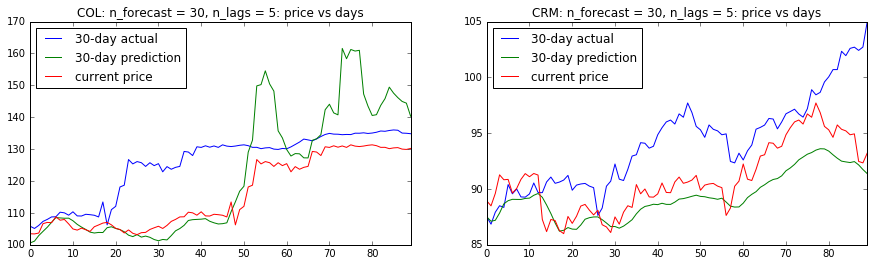

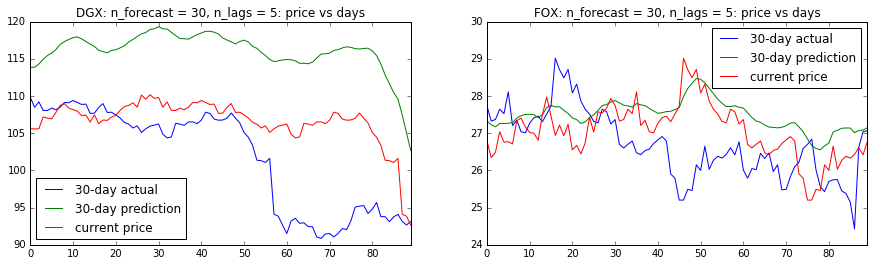

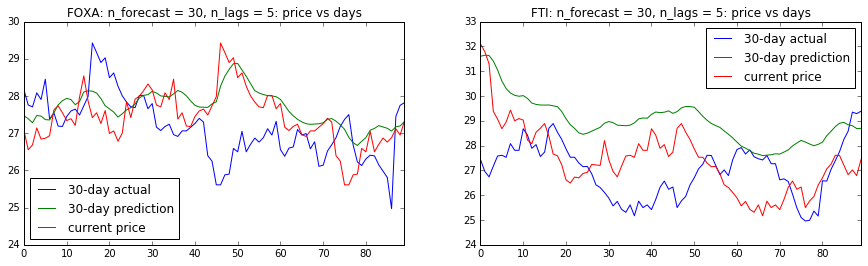

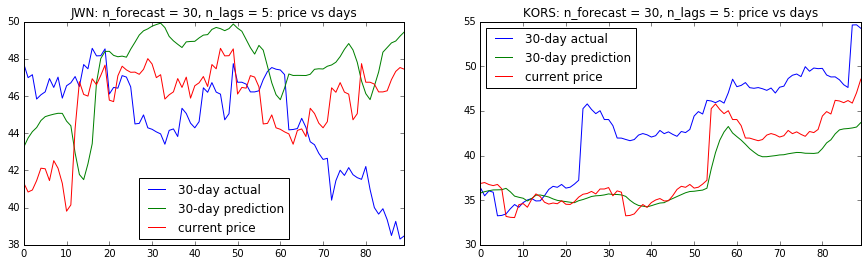

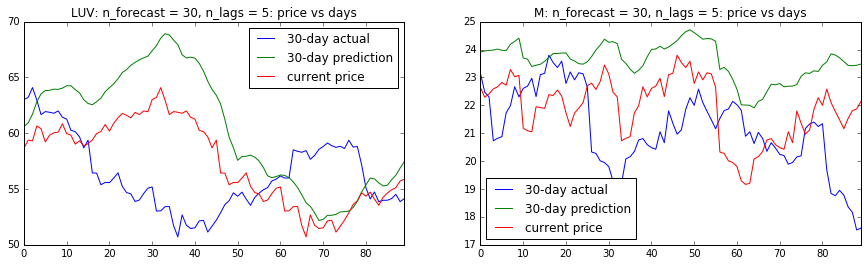

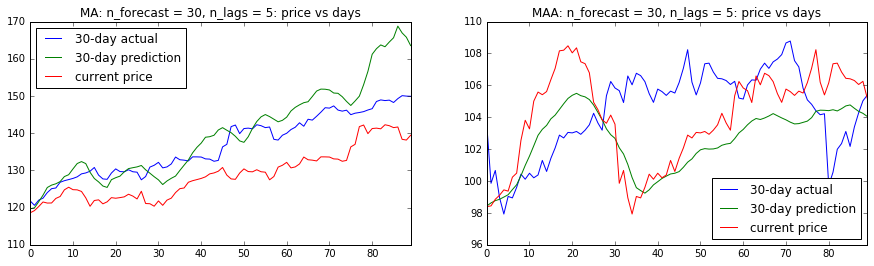

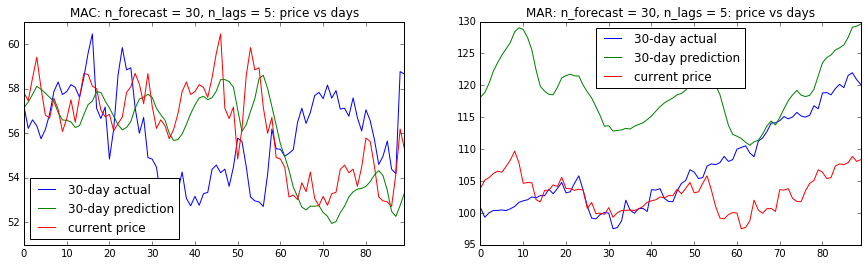

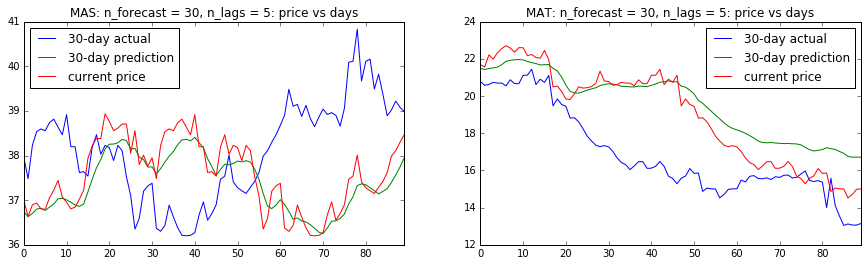

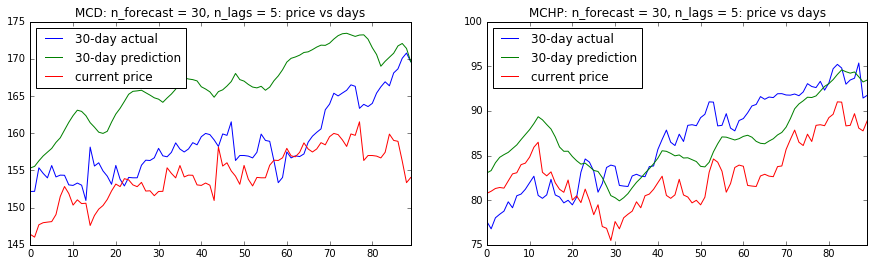

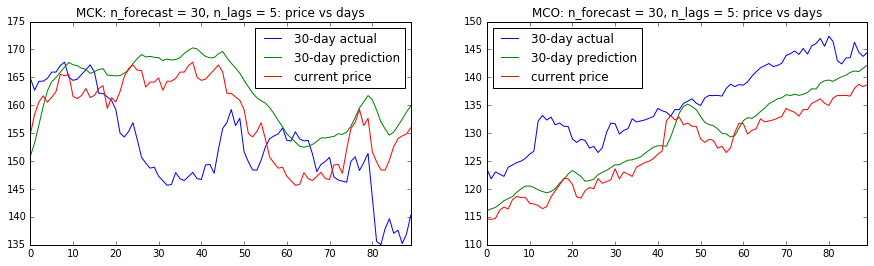

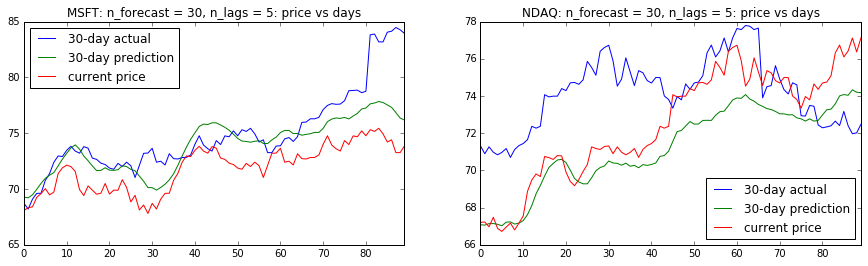

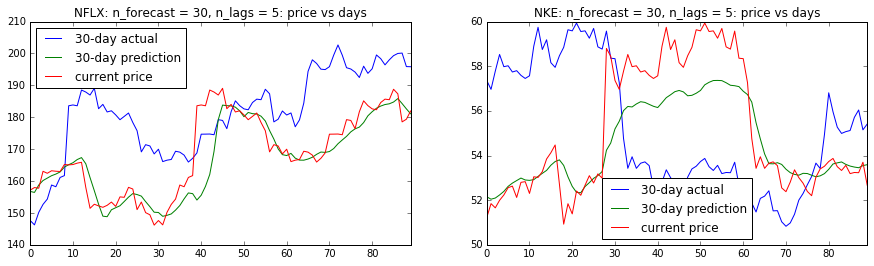

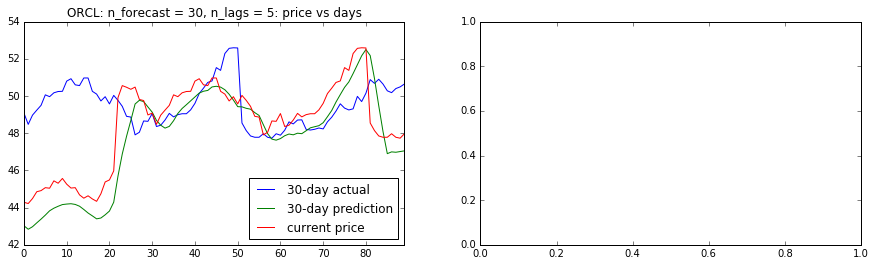

In [14]:
plot_data(rmse_df, predicted_dfs)

# 2. Use stock price, news and revenue data


In [15]:
n_lags = 5
nlp_dir = '../data/nlp_by_company'
revenue_dir = '../metadata/revenue'
n_features, orig_dfs, datasets = lstm2.set_up_data(source_dir, 
                                                   nlp_dir,
                                                   revenue_dir,
                                                   supervised_data_dir, 
                                                   n_lags, 
                                                   n_forecast)

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2001-06-15  21.080000  24.000000  21.080000  24.000000  18.632792    4200
2001-06-18  24.480000  25.320000  24.480000  25.080000  19.471264   10900
2001-06-19  25.480000  26.719999  25.480000  26.559999  20.620283   24600
2001-06-20  26.559999  27.080000  26.559999  26.879999  20.868715   56000
2001-06-21  26.719999  26.719999  25.400000  25.400000  19.719694   36700
COL
../data/sp500_test/COL.csv has 720 rows
             Volume  Adj Close
Date                          
2015-01-02   458200  81.343025
2015-01-05   746300  80.631676
2015-01-06  1000800  80.525940
2015-01-07  1450200  81.631401
2015-01-08  2587500  82.525391
('Reading', '../metadata/revenue/COL_Financials_by_Quarter.csv')
            year quarter  basiceps    netincome  totalrevenue
Date                                                         
2017-05-01  2017      Q1      1.

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2011-12-15  25.000000  25.230000  23.510000  24.200001  24.200001  42259200
2011-12-16  24.450001  24.799999  23.510000  24.100000  24.100000   3998900
2011-12-19  24.500000  25.090000  24.309999  24.879999  24.879999   3245500
2011-12-20  25.020000  25.760000  25.020000  25.450001  25.450001   1710200
2011-12-21  25.639999  26.780001  25.459999  26.549999  26.549999   2501500
KORS
../data/sp500_test/KORS.csv has 720 rows
              Volume  Adj Close
Date                           
2015-01-02   1352800  74.779999
2015-01-05   3614300  73.000000
2015-01-06  16869100  66.870003
2015-01-07   8488100  68.709999
2015-01-08   3829400  70.000000
('Reading', '../metadata/revenue/KORS_Financials_by_Quarter.csv')
            year quarter  basiceps    netincome  totalrevenue
Date                                                         
2017-05-

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2000-01-03  22.188049  22.297892  21.748682  22.133129  14.165102  1877800
2000-01-04  21.419157  22.023287  20.430580  21.583920  13.813610  1856900
2000-01-05  21.474077  21.638840  20.430580  20.595343  13.245640  1165000
2000-01-06  20.815027  20.979790  20.155975  20.815027  13.386929  1755300
2000-01-07  21.089630  22.133129  20.869947  21.583920  13.881429  1616100
MAS
../data/sp500_test/MAS.csv has 720 rows
             Volume  Adj Close
Date                          
2015-01-02  3013100  21.125765
2015-01-05  2948600  20.762539
2015-01-06  3432500  20.737206
2015-01-07  2725200  21.061586
2015-01-08  4808500  21.901331
('Reading', '../metadata/revenue/MAS_Financials_by_Quarter.csv')
            year quarter  basiceps    netincome  totalrevenue
Date                                                         
2017-05-01  2017      Q1 

            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2002-07-01  15.0  15.0  15.0  15.00  13.694478    1300
2002-07-02  15.5  16.5  15.0  15.13  13.813163    7000
2002-07-03  14.0  16.0  14.0  15.00  13.694478   10200
2002-07-05  15.0  15.0  15.0  15.00  13.694478     500
2002-07-08  14.0  14.0  14.0  14.00  12.781513     300
NDAQ
../data/sp500_test/NDAQ.csv has 720 rows
             Volume  Adj Close
Date                          
2015-01-02   596100  45.512230
2015-01-05   955600  45.274487
2015-01-06  1034700  45.245964
2015-01-07   990800  45.892601
2015-01-08  1205600  46.605812
('Reading', '../metadata/revenue/NDAQ_Financials_by_Quarter.csv')
            year quarter  basiceps    netincome  totalrevenue
Date                                                         
2017-05-01  2017      Q1      1.02  169000000.0   936000000.0
2017-08-01  2017      Q2      0.89  147000000.0   967000000.0
2017-11-01  2017      Q3      1.03  17

# Data Analysis

('Number of features:', 10)
Data for COL


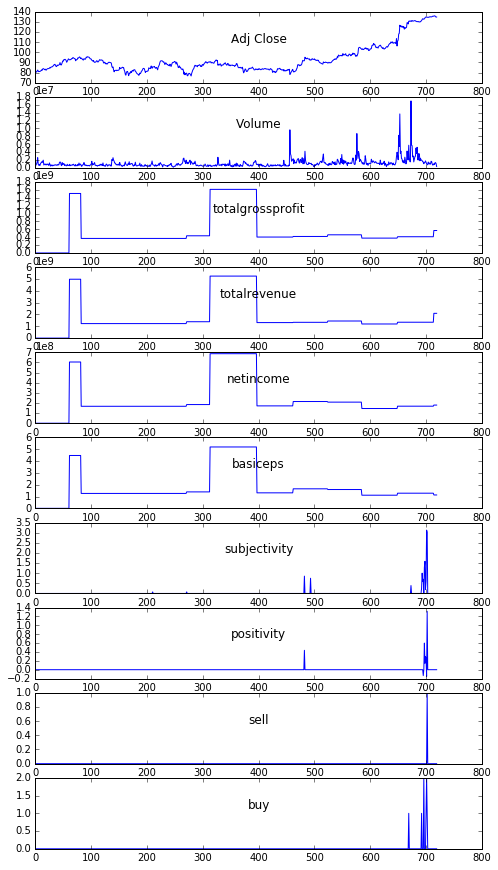

Data for CRM


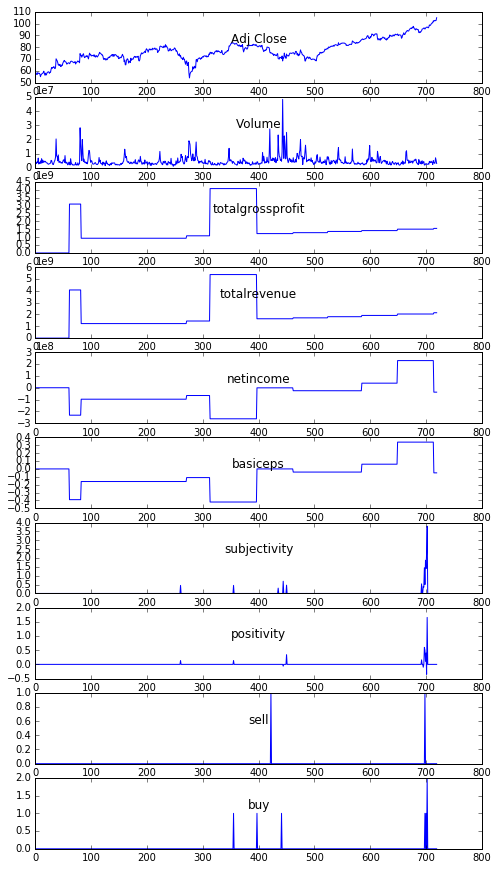

Data for DGX


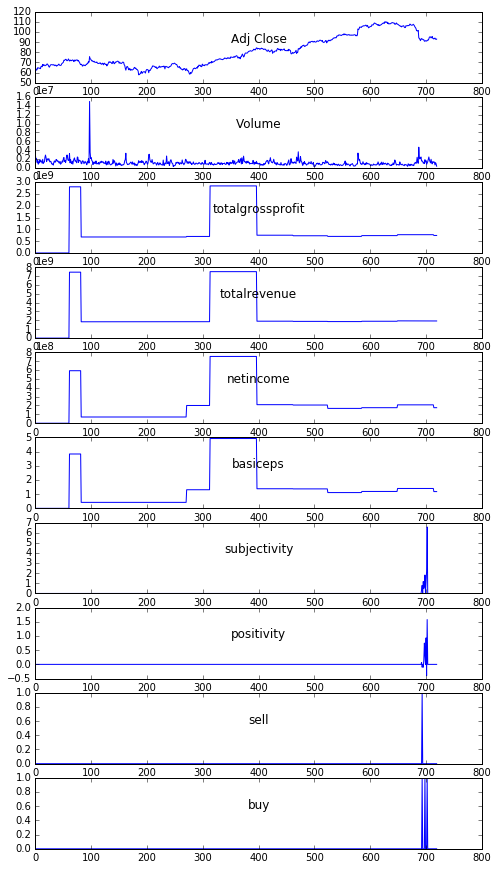

Data for FOX


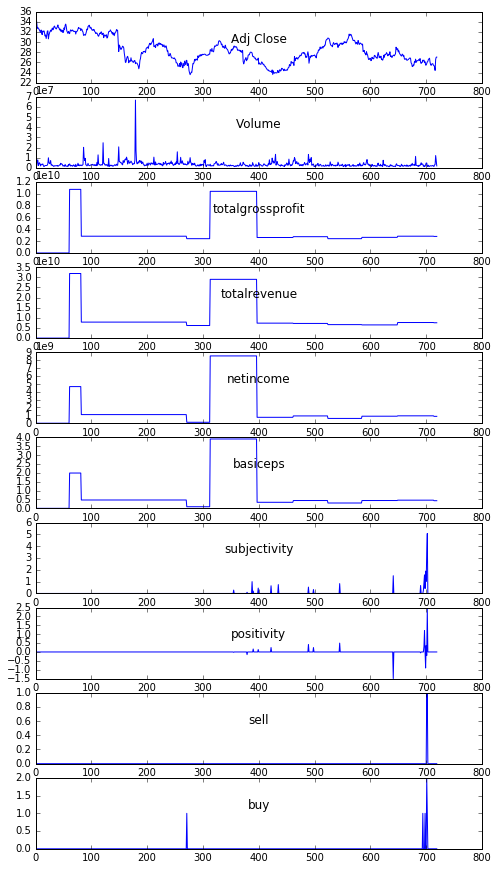

Data for FOXA


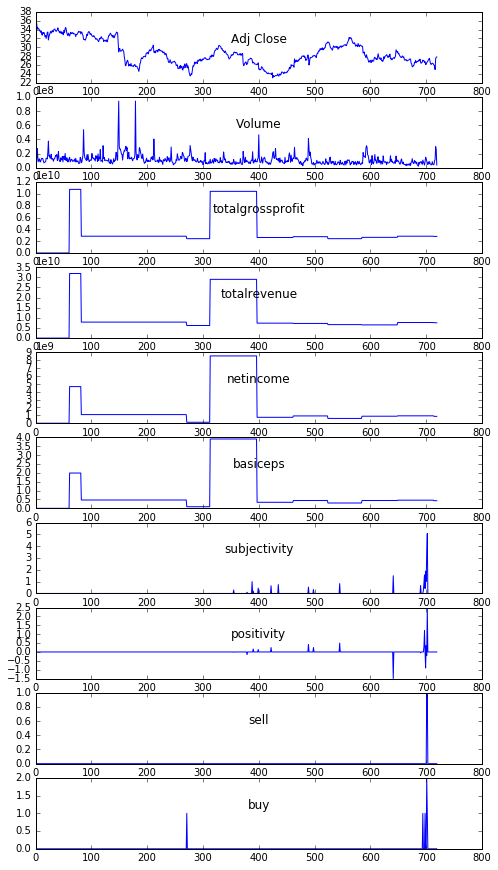

Data for FTI


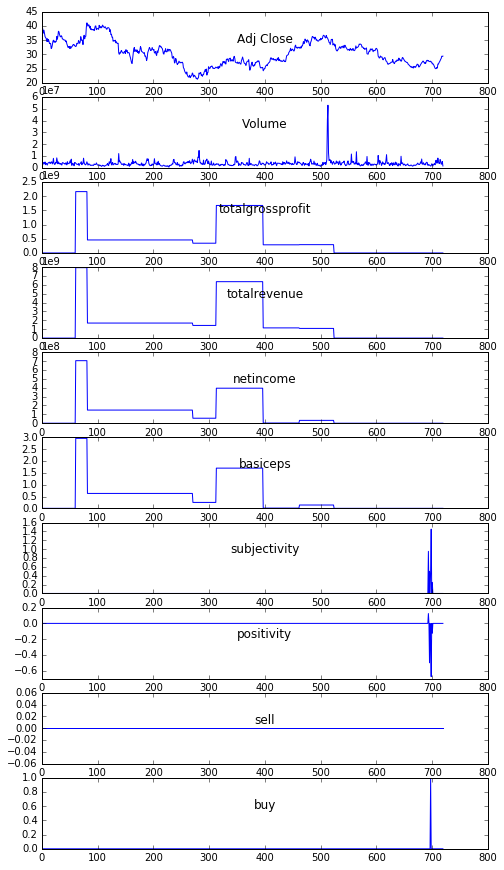

Data for JWN


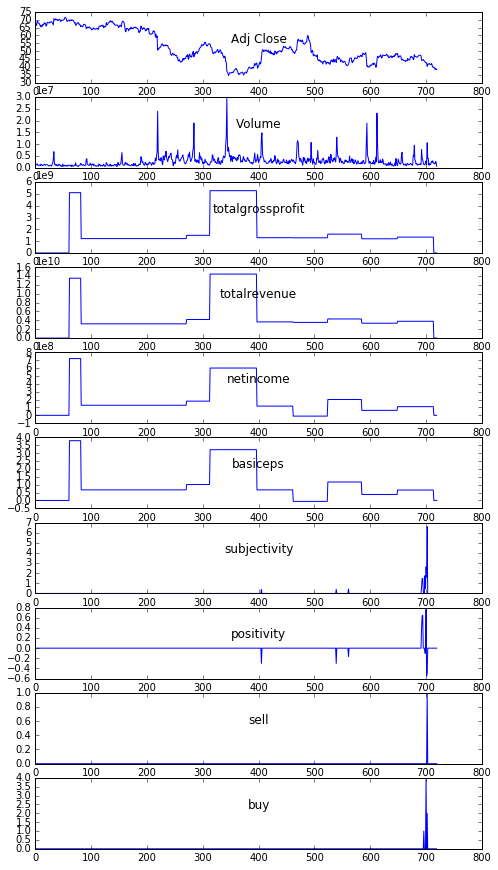

Data for KORS


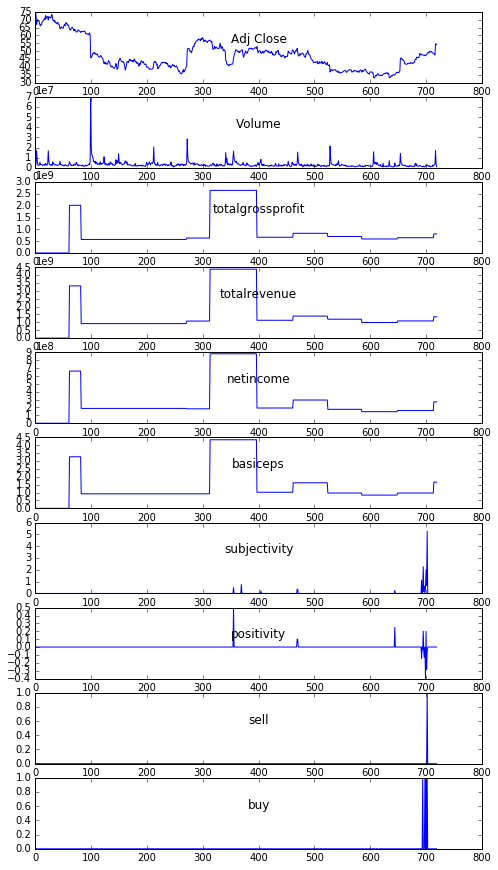

Data for LUV


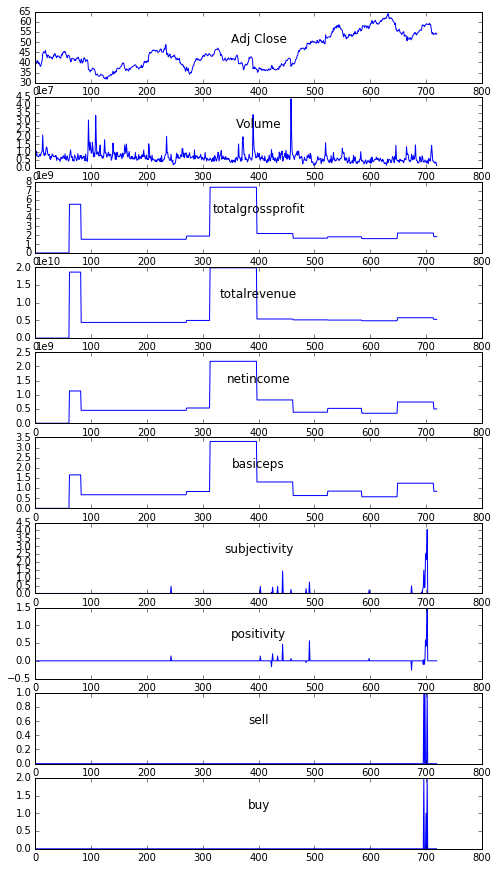

Data for M


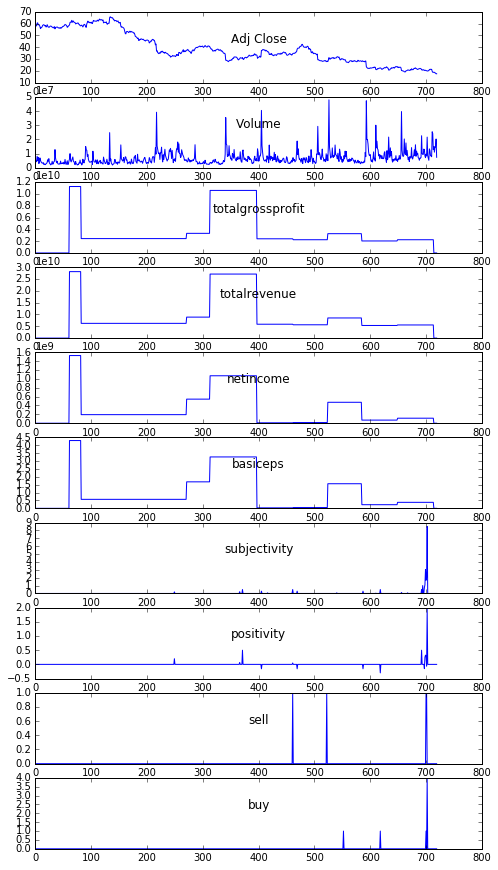

Data for MA


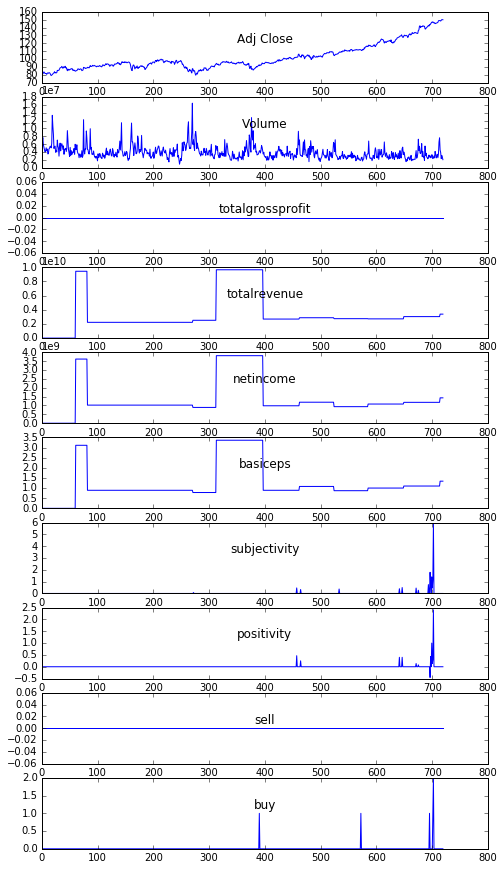

Data for MAA


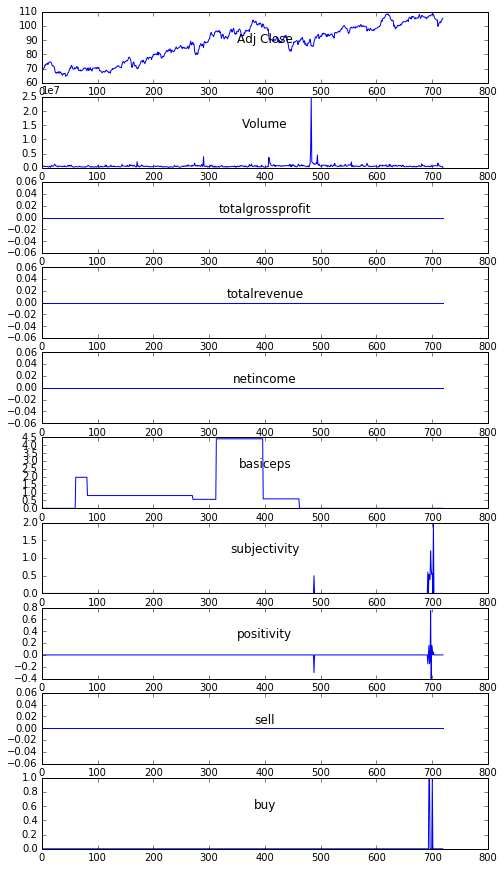

Data for MAC


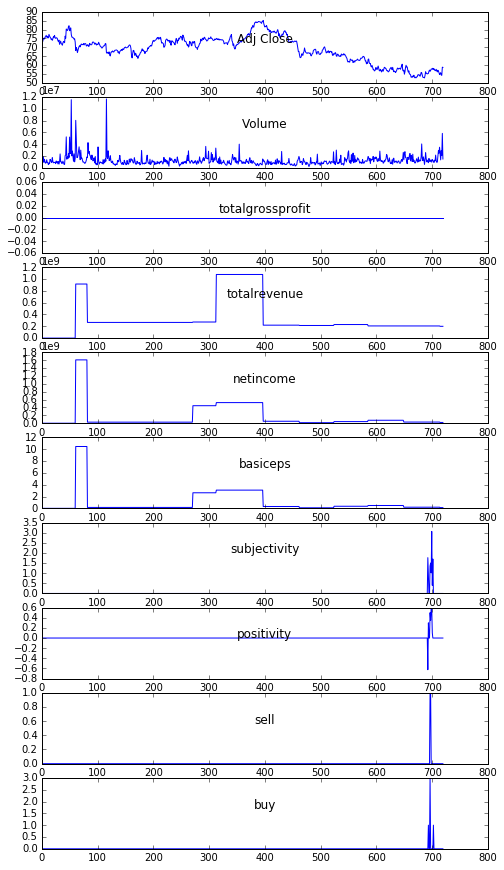

Data for MAR


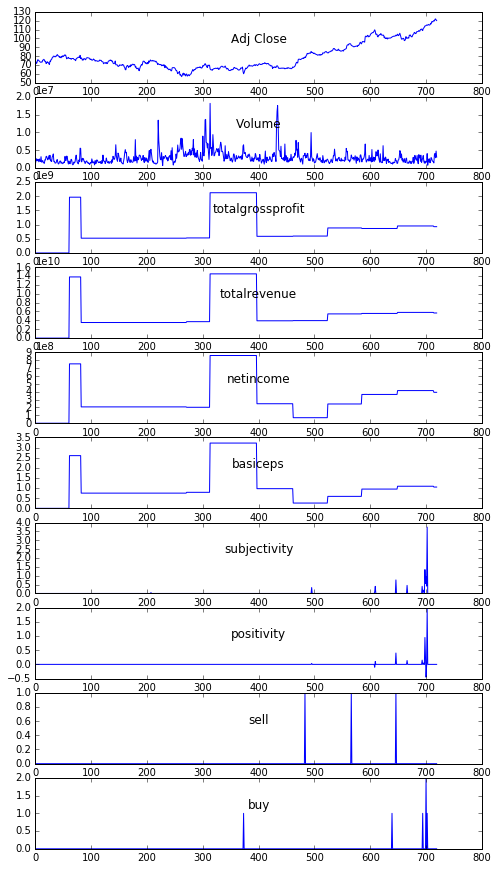

Data for MAS


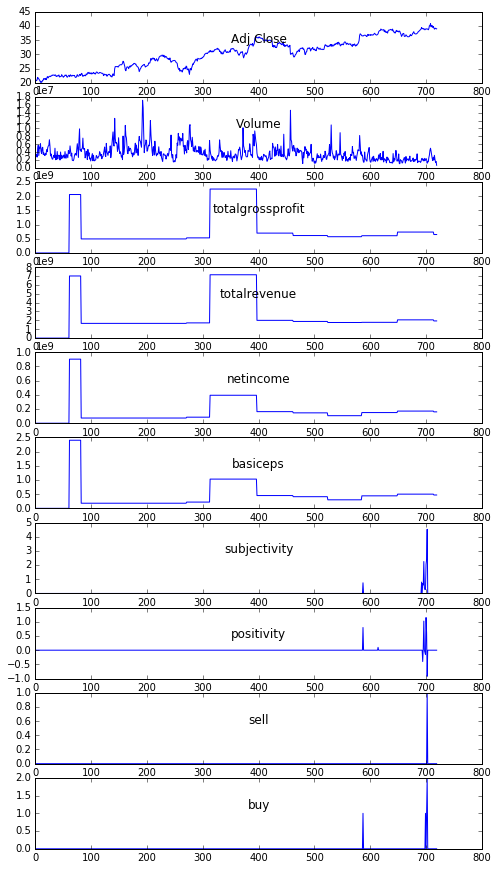

Data for MAT


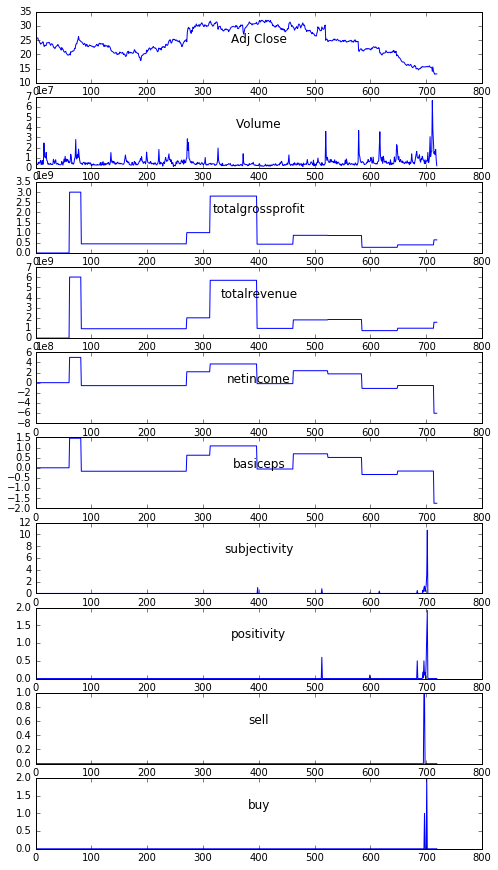

Data for MCD


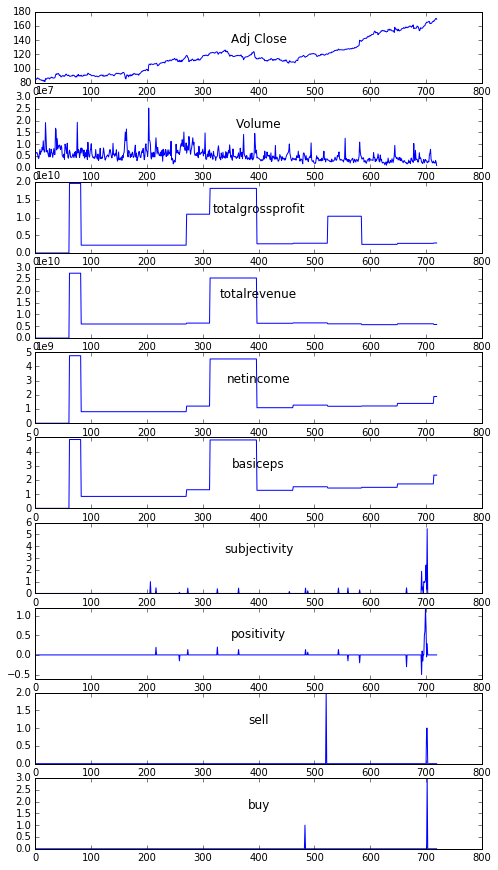

Data for MCHP


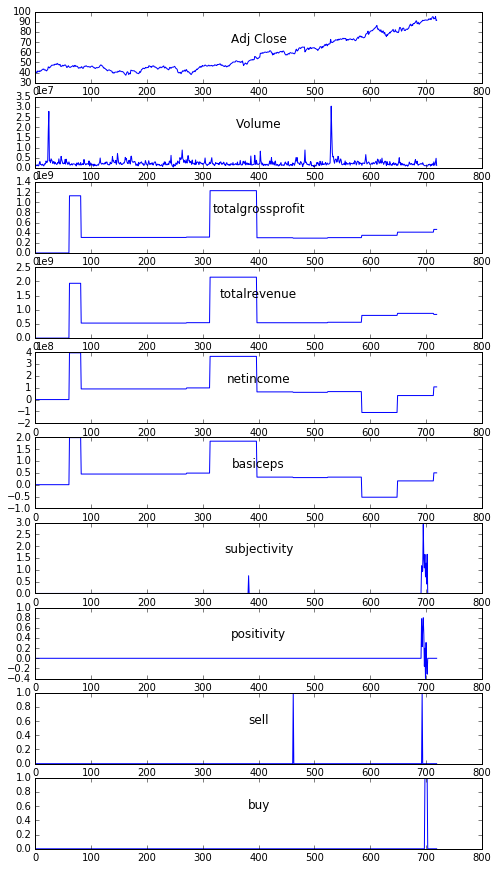

Data for MCK


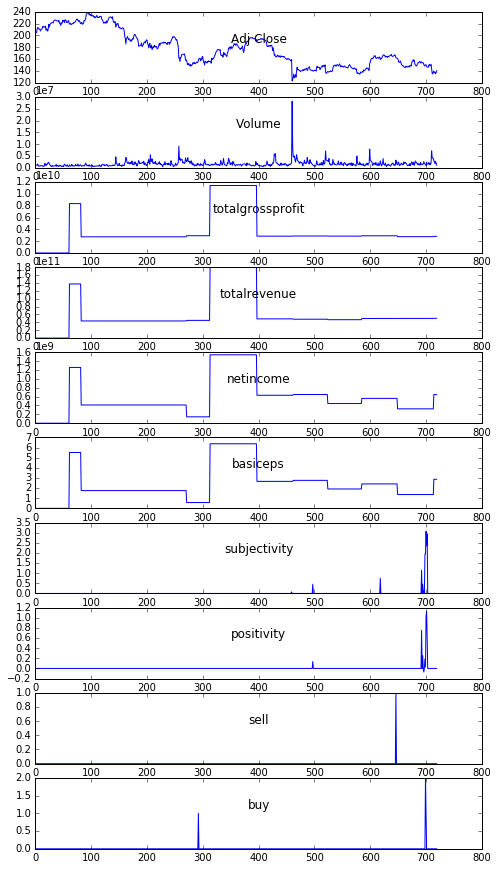

Data for MCO


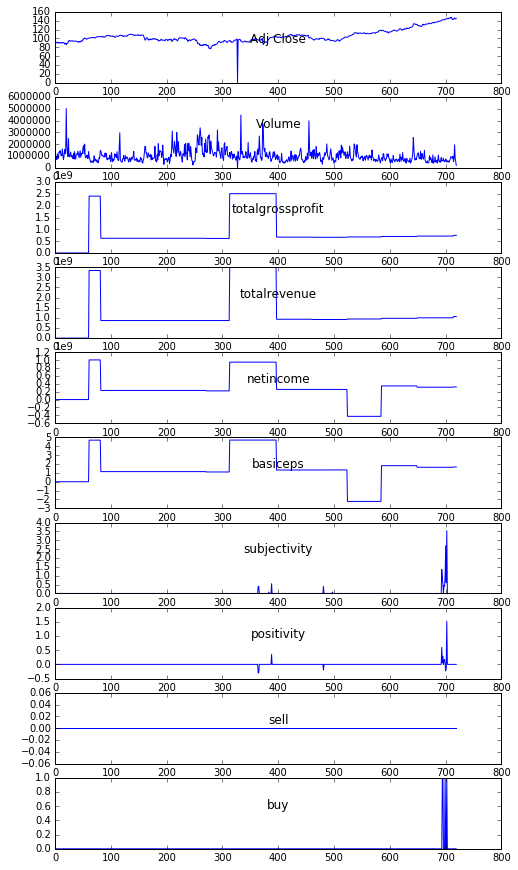

Data for MSFT


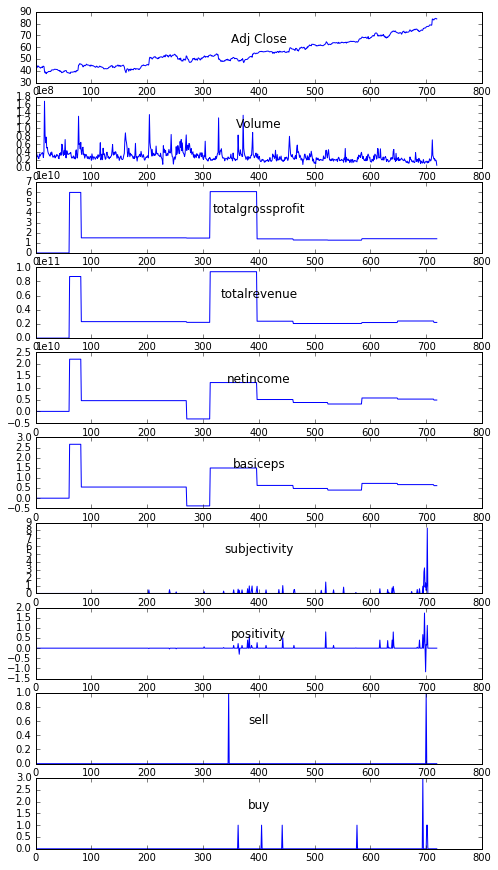

Data for NDAQ


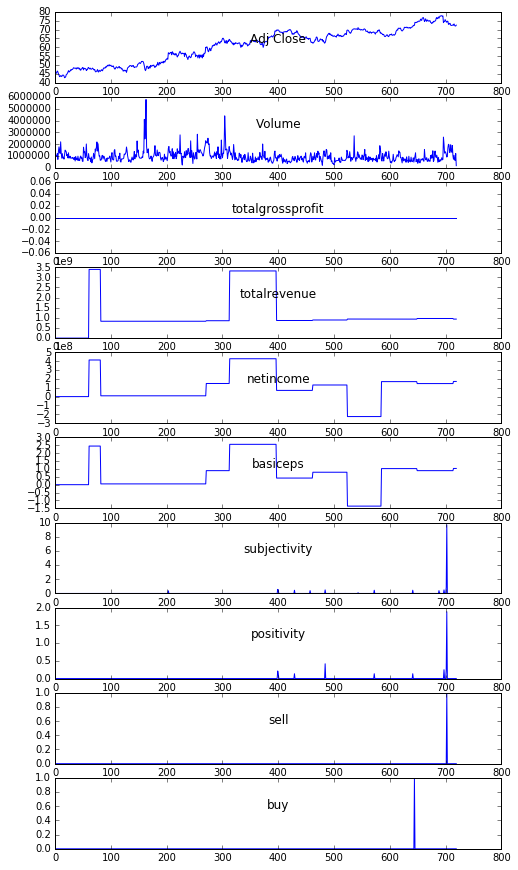

Data for NFLX


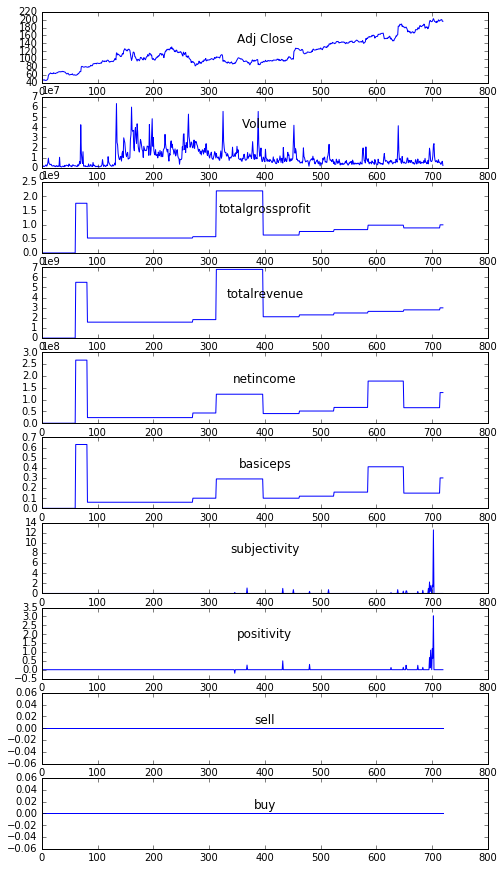

Data for NKE


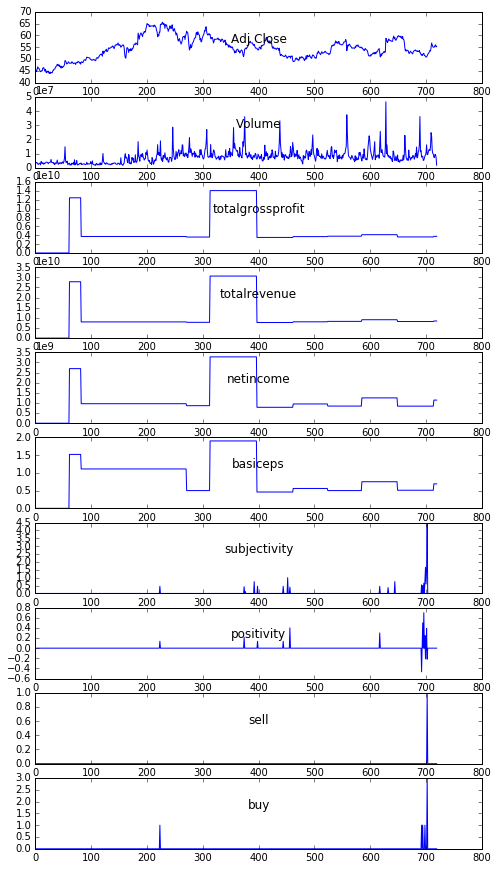

Data for ORCL


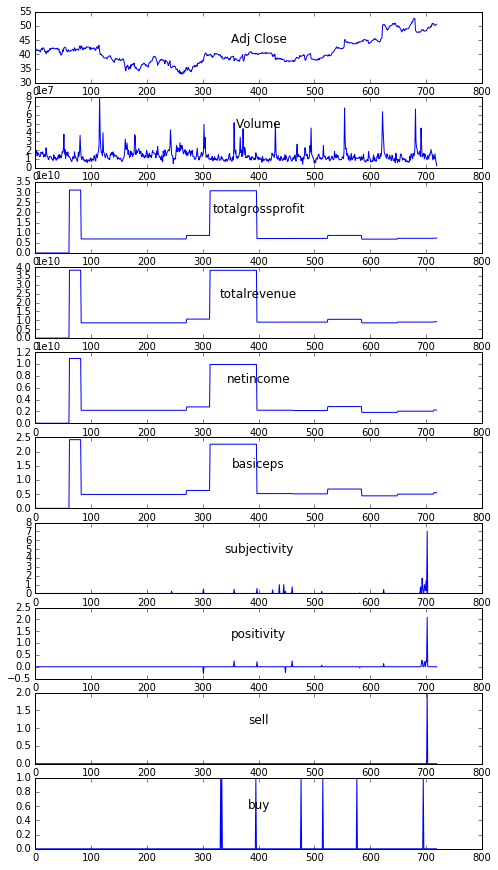

In [16]:
print('Number of features:', n_features)
for stock in sorted(orig_dfs.keys()):
    pyplot.figure(figsize=(8,15))
#    print(orig_dfs[stock][['decline']].max())
    #print(orig_dfs[stock].positivity.unique())
    #print(orig_dfs[stock].subjectivity.unique())
    #.groupby().agg({'decline': ['min', 'max', 'unique'], 'sell': ['first', 'max', 'unique']})
    print('Data for ' + stock)
    view_dataframe(orig_dfs[stock])


Data for MSFT


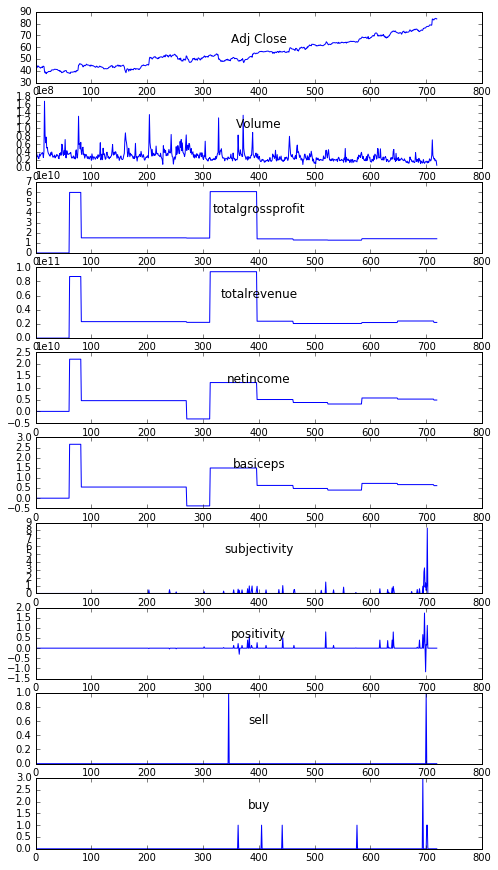

In [17]:
# Just look at 1 stock for simplicity
stock = 'MSFT'
print('Data for ' + stock)
pyplot.figure(figsize=(8,15))
view_dataframe(orig_dfs[stock])

* Stock data starts from 2000-01
* News data (subjectivity, positivity, decline, sell, buy, scandal) 
    + only available approximately for the past 500 days (ex: MSFT)
    + very sparsed
    + scandal, decline are consistently zero. Should we drop them?
    + buy, sell are sparsed, mostly 0s. Should we drop them?
* Revenue data () start from 2010?
    + operatingrevenue are 0s so we decided to drop them

## Create Models

('Processing', 'COL')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 6s - loss: 0.0807 - val_loss: 0.2787
Epoch 2/30
596/596 [==============================] - 3s - loss: 0.0650 - val_loss: 0.1914
Epoch 3/30
596/596 [==============================] - 3s - loss: 0.0640 - val_loss: 0.2461
Epoch 4/30
596/596 [==============================] - 3s - loss: 0.0629 - val_loss: 0.2402
Epoch 5/30
596/596 [==============================] - 3s - loss: 0.0646 - val_loss: 0.1968
('Saving model to', '../models/sp500_test_30/COL.h5')
('Processing', 'CRM')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 5s - loss: 0.0912 - val_loss: 0.0831
Epoch 2/30
596/596 [==============================] - 3s - loss: 0.0791 - val_loss: 0.1043
Epoch 3/30
596/596 [==============================] - 3s - loss: 0.0768 - val_loss: 0.0667
Epoch 4/30
596/596 [==============================] - 3s - loss: 0.0782 - val_loss: 

596/596 [==============================] - 3s - loss: 0.0682 - val_loss: 0.1079
Epoch 3/30
596/596 [==============================] - 3s - loss: 0.0669 - val_loss: 0.1139
Epoch 4/30
596/596 [==============================] - 3s - loss: 0.0644 - val_loss: 0.1229
('Saving model to', '../models/sp500_test_30/MAR.h5')
('Processing', 'MAS')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 6s - loss: 0.1088 - val_loss: 0.1598
Epoch 2/30
596/596 [==============================] - 3s - loss: 0.0969 - val_loss: 0.1279
Epoch 3/30
596/596 [==============================] - 3s - loss: 0.0958 - val_loss: 0.0877
Epoch 4/30
596/596 [==============================] - 3s - loss: 0.0958 - val_loss: 0.1453
Epoch 5/30
596/596 [==============================] - 3s - loss: 0.0916 - val_loss: 0.1251
Epoch 6/30
596/596 [==============================] - 3s - loss: 0.0922 - val_loss: 0.1350
('Saving model to', '../models/sp500_test_30/MAS.h5')
('Processing', 'M

596/596 [==============================] - 3s - loss: 0.1037 - val_loss: 0.1486
Epoch 7/30
596/596 [==============================] - 3s - loss: 0.1050 - val_loss: 0.1486
Epoch 8/30
596/596 [==============================] - 3s - loss: 0.1033 - val_loss: 0.1507
('Saving model to', '../models/sp500_test_30/NKE.h5')
('Processing', 'ORCL')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 7s - loss: 0.1175 - val_loss: 0.1127
Epoch 2/30
596/596 [==============================] - 3s - loss: 0.0983 - val_loss: 0.1374
Epoch 3/30
596/596 [==============================] - 3s - loss: 0.0945 - val_loss: 0.2611
Epoch 4/30
596/596 [==============================] - 3s - loss: 0.0930 - val_loss: 0.1722
('Saving model to', '../models/sp500_test_30/ORCL.h5')


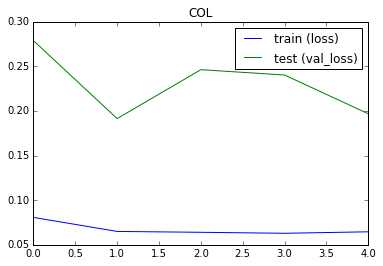

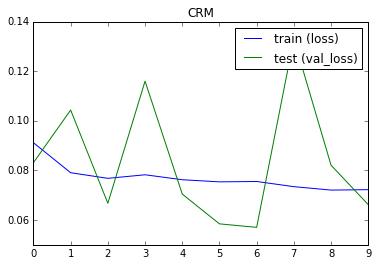

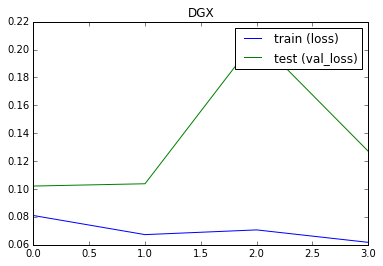

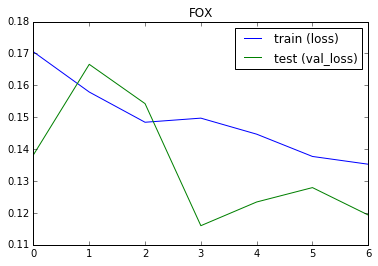

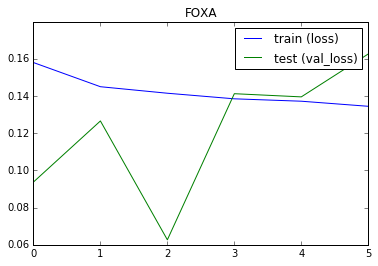

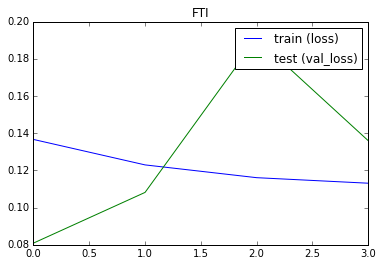

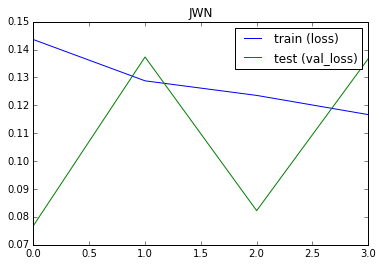

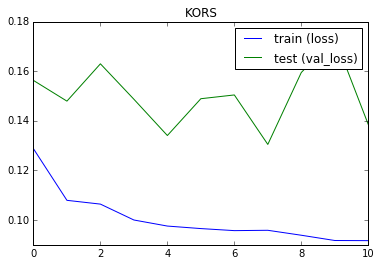

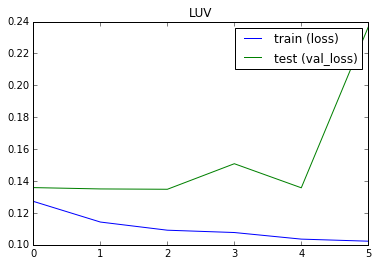

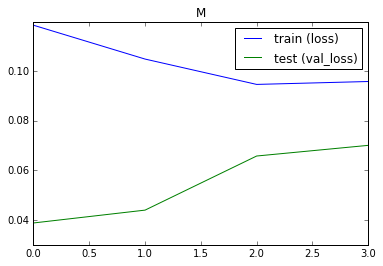

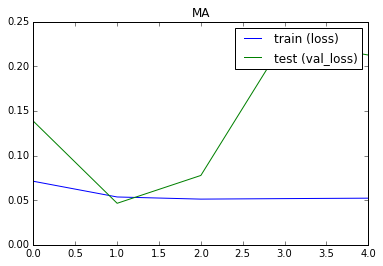

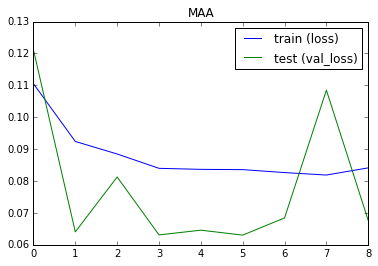

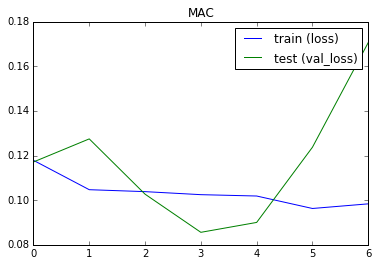

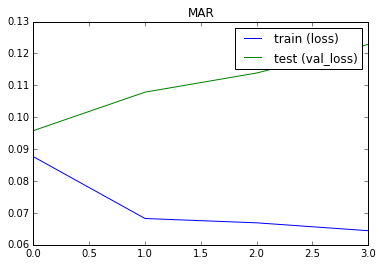

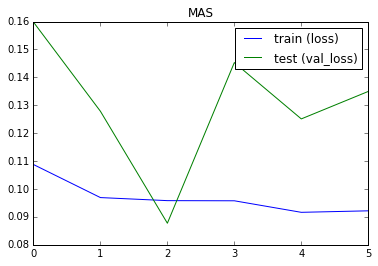

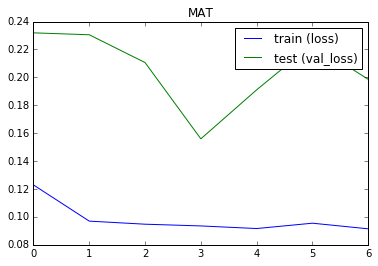

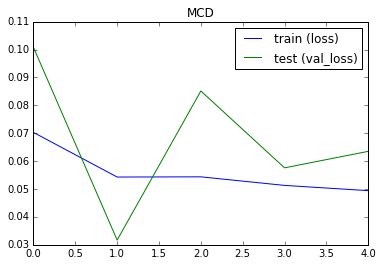

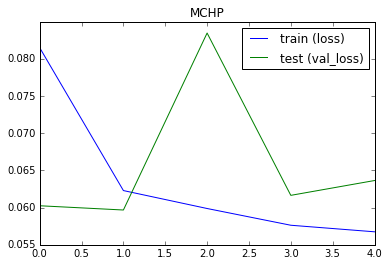

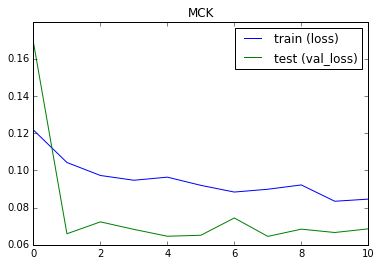

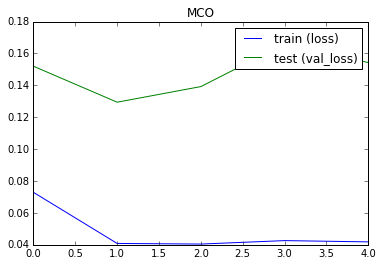

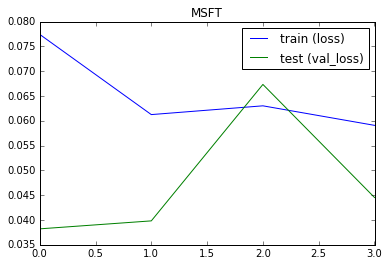

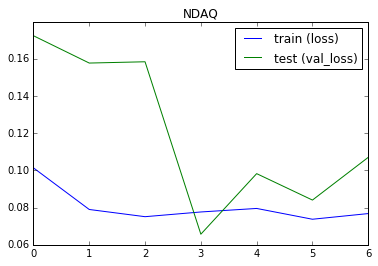

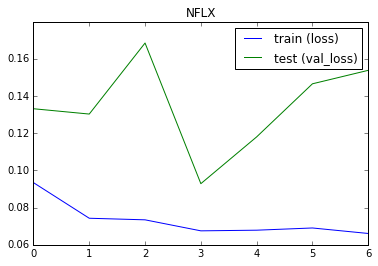

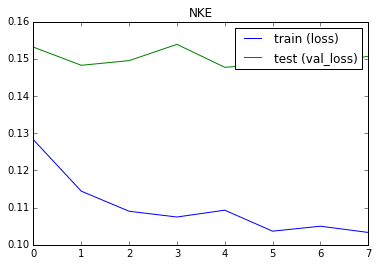

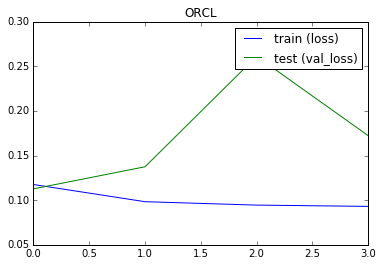

In [18]:
# With more features, increase n_neurons
histories = lstm2.build_models(supervised_data_dir, models_dir, n_test, n_lags, n_features, 
                               50)
#print(histories)
for stock in sorted(histories.keys()): # plot history
    history = histories[stock]
    plt.plot(history.history['loss'], label='train (loss)')
    plt.plot(history.history['val_loss'], label='test (val_loss)')
    plt.title(stock)
    plt.legend()
    plt.show()

## Make Predictions

In [19]:
predicted_dfs2, rmse_df2 = lstm2.predict_evaluate(models_dir, 
                                                supervised_data_dir, 
                                                prediction_data_dir, 
                                                rmse_csv, 
                                                n_test, n_lags, n_features, n_forecast)

../models/sp500_test_30/*.h5
('loading', '../models/sp500_test_30/COL.h5')
('Reading', '../data/sup_sp500_test_30/COL_supervised.csv')
Predicting...
Test RMSE: 14.654
('Writing to', '../data/prediction/sp500_test_30/COL_predicted.csv')
('loading', '../models/sp500_test_30/CRM.h5')
('Reading', '../data/sup_sp500_test_30/CRM_supervised.csv')
Predicting...
Test RMSE: 4.211
('Writing to', '../data/prediction/sp500_test_30/CRM_predicted.csv')
('loading', '../models/sp500_test_30/DGX.h5')
('Reading', '../data/sup_sp500_test_30/DGX_supervised.csv')
Predicting...
Test RMSE: 8.771
('Writing to', '../data/prediction/sp500_test_30/DGX_predicted.csv')
('loading', '../models/sp500_test_30/FOX.h5')
('Reading', '../data/sup_sp500_test_30/FOX_supervised.csv')
Predicting...
Test RMSE: 1.414
('Writing to', '../data/prediction/sp500_test_30/FOX_predicted.csv')
('loading', '../models/sp500_test_30/FOXA.h5')
('Reading', '../data/sup_sp500_test_30/FOXA_supervised.csv')
Predicting...
Test RMSE: 2.053
('Writi

In [20]:
# check RMSE as risk indicators
rmse_df2

Stock Model       rsme  predicted_std  actual_std  Day 0 predicted gain  \
10          MA  16.927177      14.992471    8.211579              0.081521   
9            M   3.689263       0.747126    1.409051              0.104657   
8          LUV   9.503348       5.108967    3.238836              0.092055   
15         MAT   4.162895       2.826244    2.341126              0.067390   
6          JWN   5.942591       1.667016    2.579945              0.125350   
5          FTI   2.962525       0.728291    1.079666             -0.006198   
16         MCD   6.224690       4.419040    4.721736              0.046392   
4         FOXA   2.053327       0.422089    0.828470              0.064787   
17        MCHP   4.300634       3.763748    5.172642              0.016570   
0          COL  14.654131      17.668362    9.958718             -0.023269   
3          FOX   1.414252       0.364108    0.900586              0.034001   
20        MSFT   2.831965       2.550584    3.717512              0.004720   
2          DGX   8.771069       2.312730    6.783398             -0.002277   
24        ORCL   4.120696       3.864187    1.182792             -0.043637   
7         KORS   5.726311       3.501348    5.524920              0.003632   
1          CRM   4.210889       4.932820    4.143099             -0.030425   
23         NKE   3.277553       1.404425    2.779957              0.074553   
11         MAA   3.533961       1.843718    2.622831              0.003748   
21        NDAQ   3.821203       1.953838    1.884039             -0.001996   
18         MCK   9.545621       2.704057    8.287043             -0.045611   
13         MAR  10.547376       4.691639    6.840695             -0.021516   
14         MAS   2.972323       0.583933    1.085133             -0.051081   
22        NFLX  25.232159      16.929456   13.328521             -0.092135   
12         MAC   7.308832       4.315938    1.905871             -0.074299   
19         MCO  23.180981       2.825054    7.055157             -0.061521   

    Day 0 actual gain  Avg predicted gain  Avg actual gain  
10           0.026913            0.177944         0.061540  
9            0.021735            0.121338        -0.033394  
8            0.074187            0.097580        -0.020107  
15          -0.042028            0.084993        -0.113384  
6            0.154909            0.084815        -0.018891  
5           -0.145171            0.083090        -0.015551  
16           0.039406            0.061815         0.028197  
4            0.040352            0.057633        -0.009565  
17          -0.039083            0.032574         0.043760  
0            0.022653            0.029047         0.082989  
3            0.034815            0.026386        -0.013437  
20           0.009204            0.020111         0.042196  
2            0.039793            0.012301        -0.046066  
24           0.108223            0.006783         0.020995  
7           -0.012476            0.006480         0.118274  
1           -0.016191            0.005525         0.035469  
23           0.119957            0.003827         0.002008  
11           0.052568           -0.013524         0.003640  
21           0.061155           -0.022120         0.023595  
18           0.065205           -0.023219        -0.034566  
13          -0.029265           -0.027274         0.036653  
14           0.025813           -0.053749         0.014178  
22          -0.060766           -0.056611         0.073146  
12          -0.010417           -0.097048        -0.005821  
19           0.078368           -0.113545         0.065583

In [21]:
# Compare to the previous one
rmse_df

Stock Model       rsme  predicted_std  actual_std  Day 0 predicted gain  \
13         MAR  14.189829       4.986046    6.840695              0.137528   
2          DGX  15.451655       2.735447    6.783398              0.077961   
10          MA   6.387898      12.526800    8.211579              0.009086   
16         MCD   8.392760       4.599549    4.721736              0.060953   
9            M   2.839298       0.657467    1.409051              0.056556   
5          FTI   2.383899       0.916671    1.079666             -0.015523   
8          LUV   7.947364       5.132798    3.238836              0.033051   
0          COL  15.312703      19.613844    9.958718             -0.027711   
17        MCHP   3.896203       3.708233    5.172642              0.028340   
6          JWN   4.659710       2.054529    2.579945              0.046878   
20        MSFT   2.452478       2.351700    3.717512              0.017467   
15         MAT   3.015099       1.752829    2.341126             -0.009256   
18         MCK  13.234526       5.850716    8.287043             -0.025222   
19         MCO   6.741043       7.524907    7.055157              0.012679   
3          FOX   1.240963       0.391744    0.900586              0.019110   
4         FOXA   1.061940       0.470322    0.828470              0.014854   
14         MAS   1.710187       0.616991    1.085133             -0.006867   
12         MAC   3.164919       2.014531    1.905871             -0.011596   
23         NKE   4.091750       1.742147    2.779957              0.018194   
22        NFLX  18.033003      11.638722   13.328521             -0.002698   
11         MAA   3.575418       1.972160    2.622831              0.000451   
24        ORCL   3.409890       2.611493    1.182792             -0.028551   
1          CRM   5.529529       2.076375    4.143099             -0.016074   
21        NDAQ   3.641927       2.219193    1.884039             -0.001913   
7         KORS   6.773855       2.995913    5.524920             -0.029177   

    Day 0 actual gain  Avg predicted gain  Avg actual gain  
13          -0.029265            0.153691         0.036653  
2            0.039793            0.088196        -0.046066  
10           0.026913            0.086751         0.061540  
16           0.039406            0.078177         0.028197  
9            0.021735            0.077873        -0.033394  
5           -0.145171            0.057645        -0.015551  
8            0.074187            0.053052        -0.020107  
0            0.022653            0.049187         0.082989  
17          -0.039083            0.045832         0.043760  
6            0.154909            0.040705        -0.018891  
20           0.009204            0.028011         0.042196  
15          -0.042028            0.027376        -0.113384  
18           0.065205            0.026527        -0.034566  
19           0.078368            0.016641         0.065583  
3            0.034815            0.016239        -0.013437  
4            0.040352            0.010154        -0.009565  
14           0.025813           -0.005197         0.014178  
12          -0.010417           -0.007546        -0.005821  
23           0.119957           -0.010086         0.002008  
22          -0.060766           -0.011369         0.073146  
11           0.052568           -0.013627         0.003640  
24           0.108223           -0.015045         0.020995  
1           -0.016191           -0.017082         0.035469  
21           0.061155           -0.017220         0.023595  
7           -0.012476           -0.026768         0.118274

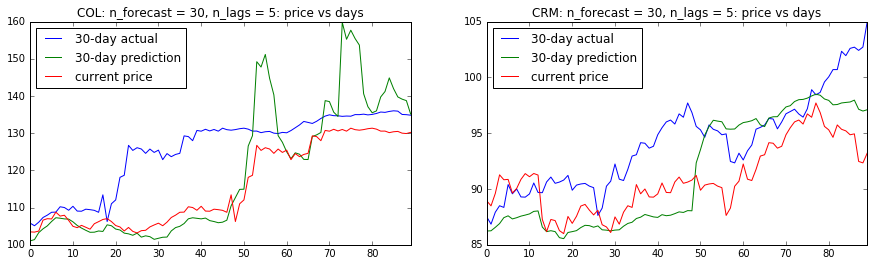

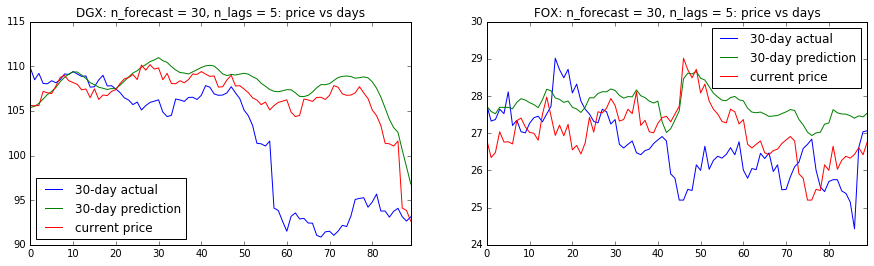

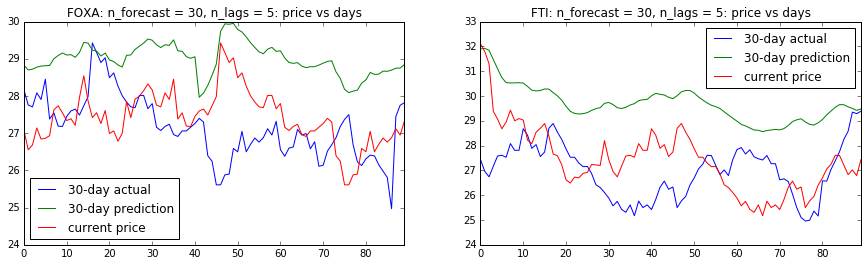

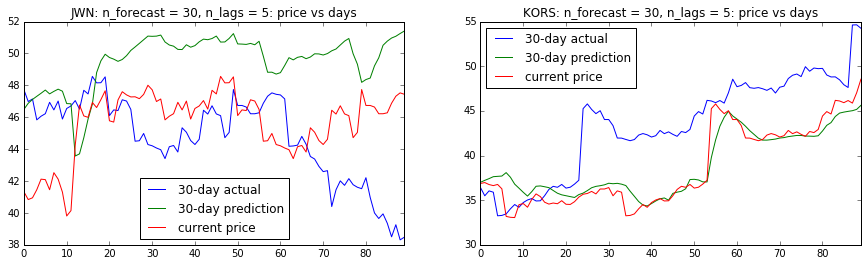

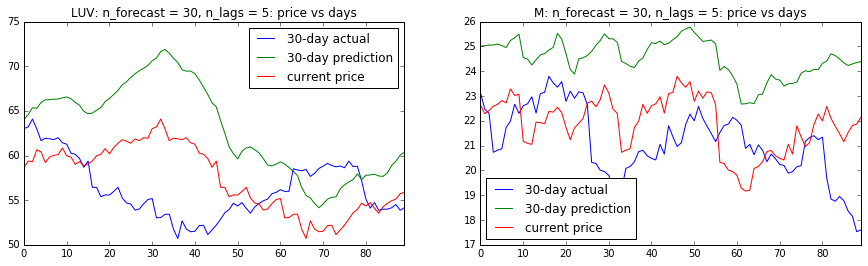

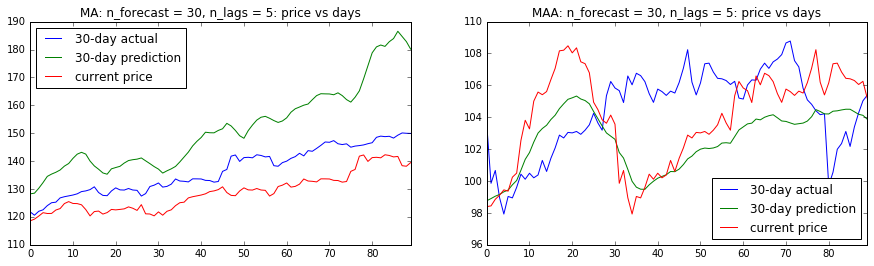

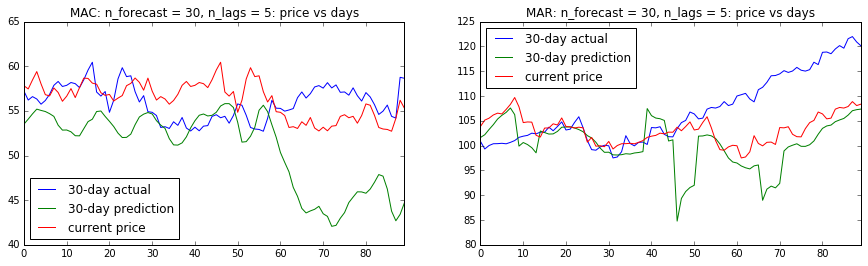

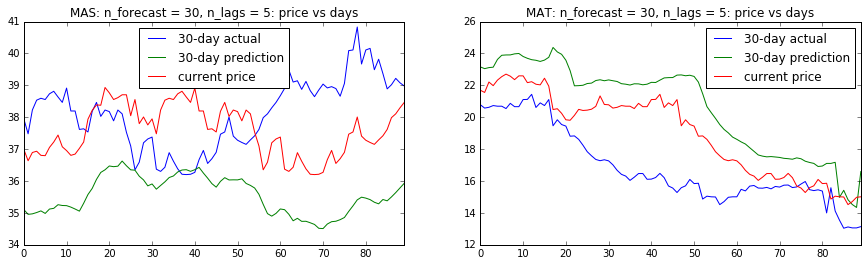

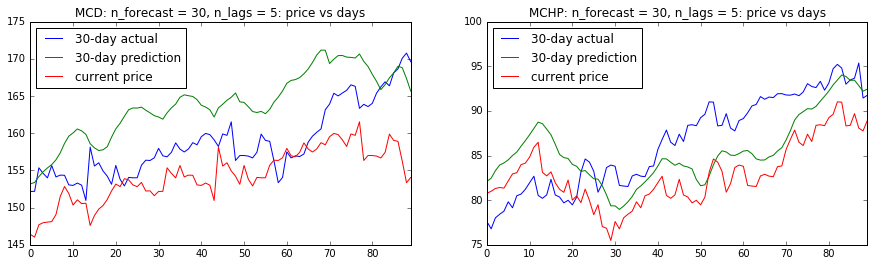

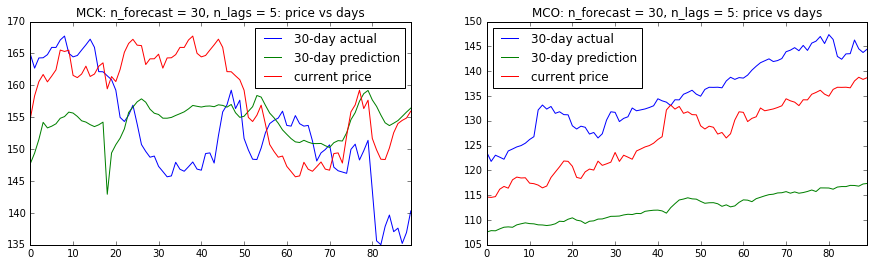

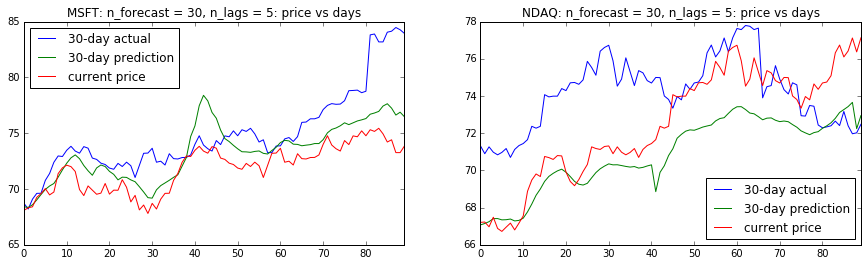

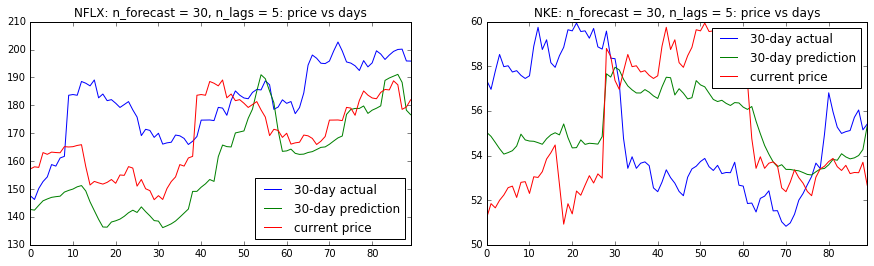

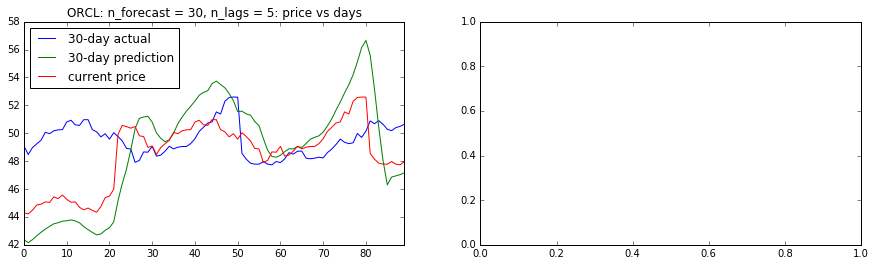

In [22]:
plot_data(rmse_df2, predicted_dfs2)

# Observations:

* This 2nd set of predictions with news and revenue data looks better than the first set

# Tuning number of neurons

Let's try to decrease n_neurons to see overfitting improves

In [5]:
#n_lags = 3 # look back 3 days

'''
Try with 50 stocks
'''
source_dir='../data/sp500_test' #'../data/sp500_1' #
print(n_lags)
n_features, orig_dfs, datasets = lstm2.set_up_data(source_dir, 
                                                   nlp_dir, 
                                                   revenue_dir,
                                                   supervised_data_dir, 
                                                   n_lags, 
                                                   n_forecast)
n_features

5
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2001-06-15  21.080000  24.000000  21.080000  24.000000  18.632792    4200
2001-06-18  24.480000  25.320000  24.480000  25.080000  19.471264   10900
2001-06-19  25.480000  26.719999  25.480000  26.559999  20.620283   24600
2001-06-20  26.559999  27.080000  26.559999  26.879999  20.868715   56000
2001-06-21  26.719999  26.719999  25.400000  25.400000  19.719694   36700
COL
../data/sp500_test/COL.csv has 720 rows
             Volume  Adj Close
Date                          
2015-01-02   458200  81.343025
2015-01-05   746300  80.631676
2015-01-06  1000800  80.525940
2015-01-07  1450200  81.631401
2015-01-08  2587500  82.525391
(686, 12)
('Generating', '../data/sup_sp500_test_30/COL_supervised.csv')
              Open    High     Low  Close  Adj Close    Volume
Date                                                          
2004-06-23  3.7500  

(686, 12)
('Generating', '../data/sup_sp500_test_30/MAS_supervised.csv')
               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2000-01-03  12.8750  13.1875  12.5625  13.0625   7.155202  2387900
2000-01-04  12.5625  13.1875  12.5000  13.1875   7.223674  3056200
2000-01-05  13.1250  13.1875  12.5625  12.7500   6.984027  3437100
2000-01-06  12.6250  13.1875  12.5625  13.0625   7.155202  3363000
2000-01-07  13.0000  13.0625  12.6875  12.6875   6.949789  2625100
MAT
../data/sp500_test/MAT.csv has 720 rows
             Volume  Adj Close
Date                          
2015-01-02  2466800  26.215508
2015-01-05  3255700  26.206903
2015-01-06  3938100  25.647667
2015-01-07  3488700  25.733704
2015-01-08  3106500  25.793930
(686, 12)
('Generating', '../data/sup_sp500_test_30/MAT_supervised.csv')
               Open     High      Low    Close  Adj Close   Volume
Date                                                     

2

In [6]:
# Try with different neurons
results = {}
n_neurons = [80, 20, 10, 5]
for n in n_neurons:
    print('# of neurons', n)
    histories = lstm2.build_models(supervised_data_dir, models_dir, n_test, n_lags, n_features, 
                                   n)
    predicted_dfs, summary_df = lstm2.predict_evaluate(models_dir, 
                                                supervised_data_dir, 
                                                prediction_data_dir, 
                                                rmse_csv, 
                                                n_test, n_lags, n_features, n_forecast)
    results[n] = (predicted_dfs, summary_df)

('# of neurons', 80)
('Processing', 'COL')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 1s - loss: 0.0751 - val_loss: 0.1799
Epoch 2/30
596/596 [==============================] - 1s - loss: 0.0685 - val_loss: 0.2292
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.0677 - val_loss: 0.2048
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.0652 - val_loss: 0.2252
('Saving model to', '../models/sp500_test_30/COL.h5')
('Processing', 'CRM')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 1s - loss: 0.0912 - val_loss: 0.1494
Epoch 2/30
596/596 [==============================] - 1s - loss: 0.0838 - val_loss: 0.2378
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.0840 - val_loss: 0.1637
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.0817 - val_loss: 0.1331
Epoch 5/30
596/596 [==============================] - 1s - loss

596/596 [==============================] - 1s - loss: 0.0907 - val_loss: 0.0938
Epoch 6/30
596/596 [==============================] - 1s - loss: 0.0893 - val_loss: 0.1298
Epoch 7/30
596/596 [==============================] - 1s - loss: 0.0916 - val_loss: 0.1093
('Saving model to', '../models/sp500_test_30/MAS.h5')
('Processing', 'MAT')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 2s - loss: 0.1190 - val_loss: 0.1788
Epoch 2/30
596/596 [==============================] - 1s - loss: 0.1018 - val_loss: 0.1630
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.0998 - val_loss: 0.1573
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.1036 - val_loss: 0.1506
Epoch 5/30
596/596 [==============================] - 1s - loss: 0.1003 - val_loss: 0.1932
Epoch 6/30
596/596 [==============================] - 1s - loss: 0.0987 - val_loss: 0.1720
Epoch 7/30
596/596 [==============================] - 1s - loss: 0.0989

Test RMSE: 16.395
('Writing to', '../data/prediction/sp500_test_30/COL_predicted.csv')
('loading', '../models/sp500_test_30/CRM.h5')
('Reading', '../data/sup_sp500_test_30/CRM_supervised.csv')
Predicting...
Test RMSE: 5.487
('Writing to', '../data/prediction/sp500_test_30/CRM_predicted.csv')
('loading', '../models/sp500_test_30/DGX.h5')
('Reading', '../data/sup_sp500_test_30/DGX_supervised.csv')
Predicting...
Test RMSE: 20.405
('Writing to', '../data/prediction/sp500_test_30/DGX_predicted.csv')
('loading', '../models/sp500_test_30/FOX.h5')
('Reading', '../data/sup_sp500_test_30/FOX_supervised.csv')
Predicting...
Test RMSE: 1.451
('Writing to', '../data/prediction/sp500_test_30/FOX_predicted.csv')
('loading', '../models/sp500_test_30/FOXA.h5')
('Reading', '../data/sup_sp500_test_30/FOXA_supervised.csv')
Predicting...
Test RMSE: 1.080
('Writing to', '../data/prediction/sp500_test_30/FOXA_predicted.csv')
('loading', '../models/sp500_test_30/FTI.h5')
('Reading', '../data/sup_sp500_test_30/

596/596 [==============================] - 1s - loss: 0.1607 - val_loss: 0.0822
Epoch 5/30
596/596 [==============================] - 1s - loss: 0.1601 - val_loss: 0.0883
Epoch 6/30
596/596 [==============================] - 1s - loss: 0.1583 - val_loss: 0.0950
Epoch 7/30
596/596 [==============================] - 1s - loss: 0.1593 - val_loss: 0.0962
('Saving model to', '../models/sp500_test_30/FOX.h5')
('Processing', 'FTI')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 3s - loss: 0.1611 - val_loss: 0.1231
Epoch 2/30
596/596 [==============================] - 1s - loss: 0.1226 - val_loss: 0.0744
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.1230 - val_loss: 0.0681
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.1220 - val_loss: 0.0870
Epoch 5/30
596/596 [==============================] - 1s - loss: 0.1221 - val_loss: 0.0928
Epoch 6/30
596/596 [==============================] - 1s - loss: 0.1232

596/596 [==============================] - 1s - loss: 0.1121 - val_loss: 0.0887
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.1116 - val_loss: 0.0671
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.1125 - val_loss: 0.1136
Epoch 5/30
596/596 [==============================] - 1s - loss: 0.1098 - val_loss: 0.0806
Epoch 6/30
596/596 [==============================] - 1s - loss: 0.1115 - val_loss: 0.0830
('Saving model to', '../models/sp500_test_30/MCK.h5')
('Processing', 'MCO')
Train on 590 samples, validate on 90 samples
Epoch 1/30
590/590 [==============================] - 4s - loss: 0.0920 - val_loss: 0.1226
Epoch 2/30
590/590 [==============================] - 1s - loss: 0.0729 - val_loss: 0.2167
Epoch 3/30
590/590 [==============================] - 1s - loss: 0.0723 - val_loss: 0.2062
Epoch 4/30
590/590 [==============================] - 1s - loss: 0.0727 - val_loss: 0.1915
('Saving model to', '../models/sp500_test_30/MCO.h5')
('Processing', 'M

Test RMSE: 1.622
('Writing to', '../data/prediction/sp500_test_30/MAS_predicted.csv')
('loading', '../models/sp500_test_30/MAT.h5')
('Reading', '../data/sup_sp500_test_30/MAT_supervised.csv')
Predicting...
Test RMSE: 3.259
('Writing to', '../data/prediction/sp500_test_30/MAT_predicted.csv')
('loading', '../models/sp500_test_30/MCD.h5')
('Reading', '../data/sup_sp500_test_30/MCD_supervised.csv')
Predicting...
Test RMSE: 7.491
('Writing to', '../data/prediction/sp500_test_30/MCD_predicted.csv')
('loading', '../models/sp500_test_30/MCHP.h5')
('Reading', '../data/sup_sp500_test_30/MCHP_supervised.csv')
Predicting...
Test RMSE: 5.930
('Writing to', '../data/prediction/sp500_test_30/MCHP_predicted.csv')
('loading', '../models/sp500_test_30/MCK.h5')
('Reading', '../data/sup_sp500_test_30/MCK_supervised.csv')
Predicting...
Test RMSE: 11.861
('Writing to', '../data/prediction/sp500_test_30/MCK_predicted.csv')
('loading', '../models/sp500_test_30/MCO.h5')
('Reading', '../data/sup_sp500_test_30/M

596/596 [==============================] - 1s - loss: 0.1147 - val_loss: 0.1495
('Saving model to', '../models/sp500_test_30/LUV.h5')
('Processing', 'MAA')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 6s - loss: 0.1726 - val_loss: 0.0674
Epoch 2/30
596/596 [==============================] - 1s - loss: 0.0848 - val_loss: 0.0794
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.0831 - val_loss: 0.0721
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.0820 - val_loss: 0.0669
Epoch 5/30
596/596 [==============================] - 1s - loss: 0.0812 - val_loss: 0.0736
Epoch 6/30
596/596 [==============================] - 1s - loss: 0.0807 - val_loss: 0.0671
Epoch 7/30
596/596 [==============================] - 1s - loss: 0.0805 - val_loss: 0.0641
Epoch 8/30
596/596 [==============================] - 1s - loss: 0.0793 - val_loss: 0.0649
Epoch 9/30
596/596 [==============================] - 1s - loss: 0.0803

590/590 [==============================] - 1s - loss: 0.0710 - val_loss: 0.1747
Epoch 6/30
590/590 [==============================] - 1s - loss: 0.0717 - val_loss: 0.1971
Epoch 7/30
590/590 [==============================] - 1s - loss: 0.0711 - val_loss: 0.1452
Epoch 8/30
590/590 [==============================] - 1s - loss: 0.0714 - val_loss: 0.1429
Epoch 9/30
590/590 [==============================] - 1s - loss: 0.0703 - val_loss: 0.1700
Epoch 10/30
590/590 [==============================] - 1s - loss: 0.0696 - val_loss: 0.1325
Epoch 11/30
590/590 [==============================] - 1s - loss: 0.0705 - val_loss: 0.1316
Epoch 12/30
590/590 [==============================] - 1s - loss: 0.0695 - val_loss: 0.0568
Epoch 13/30
590/590 [==============================] - 1s - loss: 0.0691 - val_loss: 0.0848
Epoch 14/30
590/590 [==============================] - 1s - loss: 0.0698 - val_loss: 0.0399
Epoch 15/30
590/590 [==============================] - 1s - loss: 0.0695 - val_loss: 0.0525
Epoc

Test RMSE: 4.536
('Writing to', '../data/prediction/sp500_test_30/M_predicted.csv')
('loading', '../models/sp500_test_30/MA.h5')
('Reading', '../data/sup_sp500_test_30/MA_supervised.csv')
Predicting...
Test RMSE: 3.131
('Writing to', '../data/prediction/sp500_test_30/MA_predicted.csv')
('loading', '../models/sp500_test_30/MAA.h5')
('Reading', '../data/sup_sp500_test_30/MAA_supervised.csv')
Predicting...
Test RMSE: 4.026
('Writing to', '../data/prediction/sp500_test_30/MAA_predicted.csv')
('loading', '../models/sp500_test_30/MAC.h5')
('Reading', '../data/sup_sp500_test_30/MAC_supervised.csv')
Predicting...
Test RMSE: 3.057
('Writing to', '../data/prediction/sp500_test_30/MAC_predicted.csv')
('loading', '../models/sp500_test_30/MAR.h5')
('Reading', '../data/sup_sp500_test_30/MAR_supervised.csv')
Predicting...
Test RMSE: 13.068
('Writing to', '../data/prediction/sp500_test_30/MAR_predicted.csv')
('loading', '../models/sp500_test_30/MAS.h5')
('Reading', '../data/sup_sp500_test_30/MAS_super

596/596 [==============================] - 1s - loss: 0.1319 - val_loss: 0.1240
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.1120 - val_loss: 0.1384
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.1091 - val_loss: 0.1497
('Saving model to', '../models/sp500_test_30/KORS.h5')
('Processing', 'LUV')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [==============================] - 8s - loss: 0.1637 - val_loss: 0.2587
Epoch 2/30
596/596 [==============================] - 1s - loss: 0.1355 - val_loss: 0.1210
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.1242 - val_loss: 0.1246
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.1211 - val_loss: 0.1382
Epoch 5/30
596/596 [==============================] - 1s - loss: 0.1192 - val_loss: 0.1485
('Saving model to', '../models/sp500_test_30/LUV.h5')
('Processing', 'MAA')
Train on 596 samples, validate on 90 samples
Epoch 1/30
596/596 [====================

596/596 [==============================] - 1s - loss: 0.1258 - val_loss: 0.0977
Epoch 3/30
596/596 [==============================] - 1s - loss: 0.1111 - val_loss: 0.0885
Epoch 4/30
596/596 [==============================] - 1s - loss: 0.1105 - val_loss: 0.0887
Epoch 5/30
596/596 [==============================] - 1s - loss: 0.1091 - val_loss: 0.0918
Epoch 6/30
596/596 [==============================] - 1s - loss: 0.1098 - val_loss: 0.0791
Epoch 7/30
596/596 [==============================] - 1s - loss: 0.1090 - val_loss: 0.0844
Epoch 8/30
596/596 [==============================] - 1s - loss: 0.1091 - val_loss: 0.0869
Epoch 9/30
596/596 [==============================] - 1s - loss: 0.1078 - val_loss: 0.0764
Epoch 10/30
596/596 [==============================] - 1s - loss: 0.1087 - val_loss: 0.0710
Epoch 11/30
596/596 [==============================] - 1s - loss: 0.1096 - val_loss: 0.0878
Epoch 12/30
596/596 [==============================] - 1s - loss: 0.1088 - val_loss: 0.0903
Epoch 1

Test RMSE: 2.192
('Writing to', '../data/prediction/sp500_test_30/FTI_predicted.csv')
('loading', '../models/sp500_test_30/JWN.h5')
('Reading', '../data/sup_sp500_test_30/JWN_supervised.csv')
Predicting...
Test RMSE: 4.010
('Writing to', '../data/prediction/sp500_test_30/JWN_predicted.csv')
('loading', '../models/sp500_test_30/KORS.h5')
('Reading', '../data/sup_sp500_test_30/KORS_supervised.csv')
Predicting...
Test RMSE: 6.194
('Writing to', '../data/prediction/sp500_test_30/KORS_predicted.csv')
('loading', '../models/sp500_test_30/LUV.h5')
('Reading', '../data/sup_sp500_test_30/LUV_supervised.csv')
Predicting...
Test RMSE: 6.040
('Writing to', '../data/prediction/sp500_test_30/LUV_predicted.csv')
('loading', '../models/sp500_test_30/M.h5')
('Reading', '../data/sup_sp500_test_30/M_supervised.csv')
Predicting...
Test RMSE: 2.260
('Writing to', '../data/prediction/sp500_test_30/M_predicted.csv')
('loading', '../models/sp500_test_30/MA.h5')
('Reading', '../data/sup_sp500_test_30/MA_superv

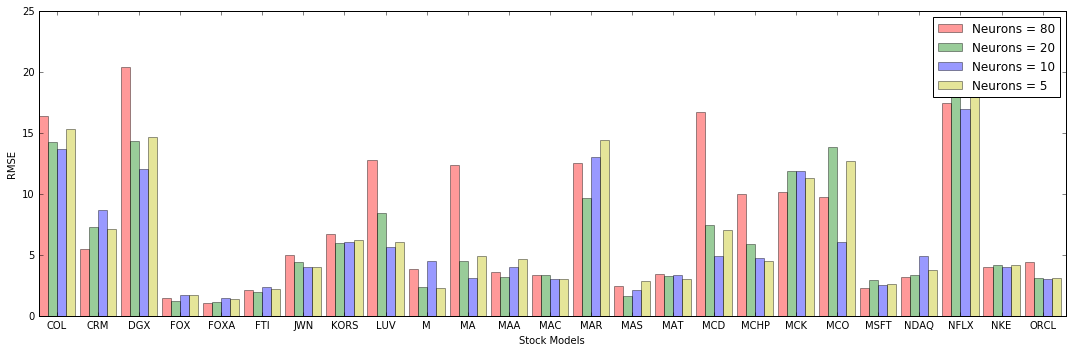

In [7]:
i = 0
bar_width = 1.0/len(n_neurons) - 0.03
opacity = 0.4
colors = ['r','g','b','y', 'm']

pyplot.figure(figsize=(15,5))
for n in n_neurons:
    predicted_dfs, summary_df = results[n]
    #print('Number of neurons', n)
    #print(summary_df.sort_values('Stock Model')[['Stock Model', 'rsme']])
    objects = summary_df.sort_values('Stock Model')['Stock Model']
    values = summary_df.sort_values('Stock Model')['rsme'].tolist()
    y_pos = np.arange(len(values))
    '''
    print(y_pos, objects,values)
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('rsme')
    plt.title('Stock''s rsme')
    
    plt.show()
    ''' 
    plt.bar(y_pos + bar_width*i, values, bar_width,
                 alpha=opacity,
                 color=colors[i], #np.random.rand(len(n_neurons),),
                 label='Neurons = ' + str(n))
    plt.xlabel('Stock Models')
    plt.ylabel('RMSE')
    i += 1

plt.xticks(y_pos + len(n_neurons)*bar_width / 2, objects)
plt.legend()
plt.tight_layout()
plt.show()

              80         20         10         5 
count  25.000000  25.000000  25.000000  25.000000
mean    7.641090   6.327713   5.925560   6.554444
std     5.768703   4.839996   4.271111   5.228398
min     1.080221   1.147959   1.500976   1.350870
25%     3.362193   3.104877   3.056860   2.995768
50%     4.992170   4.414016   4.536372   4.492536
75%    12.411119   8.471930   6.027914   7.090130
max    20.405405  18.495868  16.975316  20.847387


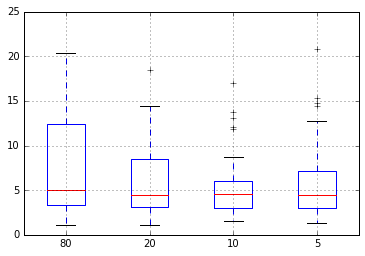

In [8]:
'''
Box plot the results
'''
df = DataFrame()
for n in n_neurons:
    predicted_dfs, summary_df = results[n]
    df[n] = summary_df.sort_values('Stock Model')['rsme'].tolist()
print(df.describe())   
df.boxplot()
plt.show()

### This shows that the best results is when n_neurons = 10

In [9]:
predicted_dfs, summary_df = results[20]
print summary_df.sort_values('Stock Model')
plot_data(summary_df, predicted_dfs)

   Stock Model       rsme  predicted_std  actual_std  Day 0 predicted gain  \
0          COL  14.288319      16.653651    9.958718             -0.033765   
1          CRM   7.315514       1.869293    4.143099             -0.034831   
2          DGX  14.388100       2.716345    6.783398              0.065751   
3          FOX   1.184879       0.372159    0.900586              0.016525   
4         FOXA   1.147959       0.433578    0.828470              0.021325   
5          FTI   1.992952       0.927498    1.079666             -0.029155   
6          JWN   4.414016       1.899489    2.579945              0.059038   
7         KORS   5.971152       2.803060    5.524920              0.001470   
8          LUV   8.471930       5.535679    3.238836              0.042410   
9            M   2.338415       0.632865    1.409051              0.028543   
10          MA   4.475770      10.863905    8.211579             -0.011024   
11         MAA   3.148234       1.649862    2.622831            

NameError: name 'plot_data' is not defined

## Observation

Comparing the 3 results together, the 3rd setting yields better accuracy

In [ ]:
#np.abs(rmse_df5['Avg predicted gain'] - rmse_df5['Avg actual gain'])

In [ ]:
#np.abs(rmse_df3['Avg predicted gain'] - rmse_df3['Avg actual gain'])

In [ ]:
#np.abs(rmse_df2['Avg predicted gain'] - rmse_df2['Avg actual gain'])

In [ ]:
#np.abs(rmse_df['Avg predicted gain'] - rmse_df['Avg actual gain'])

In [ ]:
from keras.utils import plot_model
from keras.models import load_model
from IPython.display import Image

model_fname = '../models/sp500_test_30/MSFT.h5'
png_fname = 'MSFT.png'
plot_model(model = load_model(model_fname), to_file=png_fname, show_shapes=True, show_layer_names=True)
Image(png_fname)
